In [262]:
%matplotlib inline
import rpy2
import rpy2.robjects.packages as rpackages
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import networkx as nx
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [263]:
weightmin=[]
dmin=[]

In [388]:
fn_list = ["./igo2004.csv","./igoSet1995.csv","./igoSet2000.csv","./igoSet2005.csv","./O13.csv","./O7.csv","./O4.csv","./O3.csv","./O2.csv"]

In [711]:
fn = fn_list[4]#bis einschl. 6 "./igoSet2005.csv"
%Rpush fn

In [712]:
%%R
df <- read.table(fn,sep=",")

In [713]:
%%R
df

   V1       V2
1  NA   ioname
2   5  AralSea
3   6     AsDB
4   8    CAECC
5  10     CICA
6  11      CIS
7  15     EBRD
8  16      ECO
9  17    EMPPO
10 18      FAO
11 21     IAEA
12 22     ICAC
13 23      ICC
14 25   ICivDO
15 26     IEXB
16 27     IFAD
17 28      IGC
18 30      IIF
19 31      IMO
20 34 INTERPOL
21 35     IOLM
22 36    IOMig
23 38     IOcC
24 40      ISB
25 41     ISDB
26 42    ITVRC
27 44    IUPIP
28 45   IUPLAW
29 46   IUPNVP
30 47     JINR
31 48     MIGA
32 49      OCR
33 50      OIC
34 51     OSCE
35 52      PCA
36 53    PIARC
37 54      RCC
38 56  Turksoy
39 58   UNESCO
40 59    UNIDO
41 62   WTOURO
                                                                   V3   V4
1                                                             orgname year
2                                      Int'l Fund for Saving Aral Sea 2005
3                                                     Asian Dev. Bank 2005
4                                    Central Asian Economic Community 

In [714]:
%%R
df[i,][5:length(df[i,])]

     V5   V6   V7   V8   V9  V10  V11  V12
NA <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>


In [715]:
%%R
x <- matrix(0, nrow = length(df[i,][5:length(df[i,])]), ncol = length(df[i,][5:length(df[i,])]))
for (i in 2:length(df[,1])) {
    print (i)
    print (df[i,][5:length(df[i,])])
    print (length(df[i,][5:length(df[i,])]))
    
    for (j in 1:length(df[i,][5:length(df[i,])])){
        print (j)
        print (df[i,][5:length(df[i,])][j])
        if (df[i,][5:length(df[i,])][j]==0){
            print ("zero")
        }else{
            for (k in 1:length(df[i,][5:length(df[i,])])){
                print (k)
                if (df[i,][5:length(df[i,])][k]==1){
                print (x[k,j])
                x[k,j]=x[k,j]+1
                print (x[k,j])
                print ("target")
                }
            }
        }
    }
    #for (country_val in df[i,][5:length(df[i,])]){
    #    print (country_val)
    #    if (country_val==0) {
    #    
    #    print ("bla")
    #    }else {
    #    print ("nobla")
    #    }
    #    
    #}
}

[1] 2
  V5 V6 V7 V8 V9 V10 V11 V12
2  0  0  1  1  1   1   1   0
[1] 8
[1] 1
  V5
2  0
[1] "zero"
[1] 2
  V6
2  0
[1] "zero"
[1] 3
  V7
2  1
[1] 1
[1] 2
[1] 3
[1] 0
[1] 1
[1] "target"
[1] 4
[1] 0
[1] 1
[1] "target"
[1] 5
[1] 0
[1] 1
[1] "target"
[1] 6
[1] 0
[1] 1
[1] "target"
[1] 7
[1] 0
[1] 1
[1] "target"
[1] 8
[1] 4
  V8
2  1
[1] 1
[1] 2
[1] 3
[1] 0
[1] 1
[1] "target"
[1] 4
[1] 0
[1] 1
[1] "target"
[1] 5
[1] 0
[1] 1
[1] "target"
[1] 6
[1] 0
[1] 1
[1] "target"
[1] 7
[1] 0
[1] 1
[1] "target"
[1] 8
[1] 5
  V9
2  1
[1] 1
[1] 2
[1] 3
[1] 0
[1] 1
[1] "target"
[1] 4
[1] 0
[1] 1
[1] "target"
[1] 5
[1] 0
[1] 1
[1] "target"
[1] 6
[1] 0
[1] 1
[1] "target"
[1] 7
[1] 0
[1] 1
[1] "target"
[1] 8
[1] 6
  V10
2   1
[1] 1
[1] 2
[1] 3
[1] 0
[1] 1
[1] "target"
[1] 4
[1] 0
[1] 1
[1] "target"
[1] 5
[1] 0
[1] 1
[1] "target"
[1] 6
[1] 0
[1] 1
[1] "target"
[1] 7
[1] 0
[1] 1
[1] "target"
[1] 8
[1] 7
  V11
2   1
[1] 1
[1] 2
[1] 3
[1] 0
[1] 1
[1] "target"
[1] 4
[1] 0
[1] 1
[1] "target"
[1] 5
[1] 0
[1] 1
[1] "tar

In [716]:
%%R
degree(x)


Error in degree(x) : could not find function "degree"


In [717]:
%%R
length(df[i,][0:length(df[i,])])

[1] 12


In [718]:
%%R
for (j in 5:length(df[i,][0:length(df[i,])])){
    a = 0
for (i in df[, j][2:length(df[, j])]){
    #print (class(i))
    a = a + as.numeric(i) 
}
    print (a)
}

[1] 29
[1] 22
[1] 33
[1] 30
[1] 21
[1] 18
[1] 29
[1] 20


In [719]:
%%R
x

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8]
[1,]   29   19   24   20   12   12   23   16
[2,]   19   22   18   16    9    8   15   15
[3,]   24   18   33   27   20   17   25   15
[4,]   20   16   27   30   20   17   25   13
[5,]   12    9   20   20   21   13   17    8
[6,]   12    8   17   17   13   18   15    6
[7,]   23   15   25   25   17   15   29   12
[8,]   16   15   15   13    8    6   12   20


In [720]:
%Rpull x

In [721]:
print x

[[ 29.  19.  24.  20.  12.  12.  23.  16.]
 [ 19.  22.  18.  16.   9.   8.  15.  15.]
 [ 24.  18.  33.  27.  20.  17.  25.  15.]
 [ 20.  16.  27.  30.  20.  17.  25.  13.]
 [ 12.   9.  20.  20.  21.  13.  17.   8.]
 [ 12.   8.  17.  17.  13.  18.  15.   6.]
 [ 23.  15.  25.  25.  17.  15.  29.  12.]
 [ 16.  15.  15.  13.   8.   6.  12.  20.]]


In [722]:
with open("./plots_adjusted/%s"%(fn.replace("./","")), "wb") as f:
    np.savetxt(f, x.astype(int), fmt='%i', delimiter=",")

In [723]:
%%R
y = df[1, ][5:length(df[i,][0:length(df[i,])])]

In [724]:
%Rpull y

In [725]:
print y

       V5     V6          V7          V8          V9           V10  \
1  russia  china  kazakhstan  kyrgyzstan  tajikistan  turkmenistan   

          V11  V12  
1  uzbekistan  usa  


In [726]:
type(y)

pandas.core.frame.DataFrame

In [727]:
c = []
for index, row in y.iterrows():
    for i in row:
        c.append(i)

In [728]:
#a = np.loadtxt("bla1.csv", delimiter=',', unpack=True)
a = x

In [729]:
#with open("country.csv") as f:
#    for line in f:
#        c = line.replace("\"","").replace("\n","").split(",")

In [730]:
print(c)

['russia', 'china', 'kazakhstan', 'kyrgyzstan', 'tajikistan', 'turkmenistan', 'uzbekistan', 'usa']


In [731]:
print(a)

[[ 29.  19.  24.  20.  12.  12.  23.  16.]
 [ 19.  22.  18.  16.   9.   8.  15.  15.]
 [ 24.  18.  33.  27.  20.  17.  25.  15.]
 [ 20.  16.  27.  30.  20.  17.  25.  13.]
 [ 12.   9.  20.  20.  21.  13.  17.   8.]
 [ 12.   8.  17.  17.  13.  18.  15.   6.]
 [ 23.  15.  25.  25.  17.  15.  29.  12.]
 [ 16.  15.  15.  13.   8.   6.  12.  20.]]


In [732]:
d = a.diagonal()

In [733]:
print(d.tolist())

[29.0, 22.0, 33.0, 30.0, 21.0, 18.0, 29.0, 20.0]


In [734]:
b = np.triu(a)

In [735]:
np.fill_diagonal(b, 0)

In [736]:
print(b)

[[  0.  19.  24.  20.  12.  12.  23.  16.]
 [  0.   0.  18.  16.   9.   8.  15.  15.]
 [  0.   0.   0.  27.  20.  17.  25.  15.]
 [  0.   0.   0.   0.  20.  17.  25.  13.]
 [  0.   0.   0.   0.   0.  13.  17.   8.]
 [  0.   0.   0.   0.   0.   0.  15.   6.]
 [  0.   0.   0.   0.   0.   0.   0.  12.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


In [737]:
G=nx.Graph()
for idx,i in enumerate(b):
    for idy,j in enumerate(i):
        if j!=0:
            print idx,idy
            print(c[idx],c[idy],j)
            G.add_edge(c[idx],c[idy],weight=j)

0 1
('russia', 'china', 19.0)
0 2
('russia', 'kazakhstan', 24.0)
0 3
('russia', 'kyrgyzstan', 20.0)
0 4
('russia', 'tajikistan', 12.0)
0 5
('russia', 'turkmenistan', 12.0)
0 6
('russia', 'uzbekistan', 23.0)
0 7
('russia', 'usa', 16.0)
1 2
('china', 'kazakhstan', 18.0)
1 3
('china', 'kyrgyzstan', 16.0)
1 4
('china', 'tajikistan', 9.0)
1 5
('china', 'turkmenistan', 8.0)
1 6
('china', 'uzbekistan', 15.0)
1 7
('china', 'usa', 15.0)
2 3
('kazakhstan', 'kyrgyzstan', 27.0)
2 4
('kazakhstan', 'tajikistan', 20.0)
2 5
('kazakhstan', 'turkmenistan', 17.0)
2 6
('kazakhstan', 'uzbekistan', 25.0)
2 7
('kazakhstan', 'usa', 15.0)
3 4
('kyrgyzstan', 'tajikistan', 20.0)
3 5
('kyrgyzstan', 'turkmenistan', 17.0)
3 6
('kyrgyzstan', 'uzbekistan', 25.0)
3 7
('kyrgyzstan', 'usa', 13.0)
4 5
('tajikistan', 'turkmenistan', 13.0)
4 6
('tajikistan', 'uzbekistan', 17.0)
4 7
('tajikistan', 'usa', 8.0)
5 6
('turkmenistan', 'uzbekistan', 15.0)
5 7
('turkmenistan', 'usa', 6.0)
6 7
('uzbekistan', 'usa', 12.0)


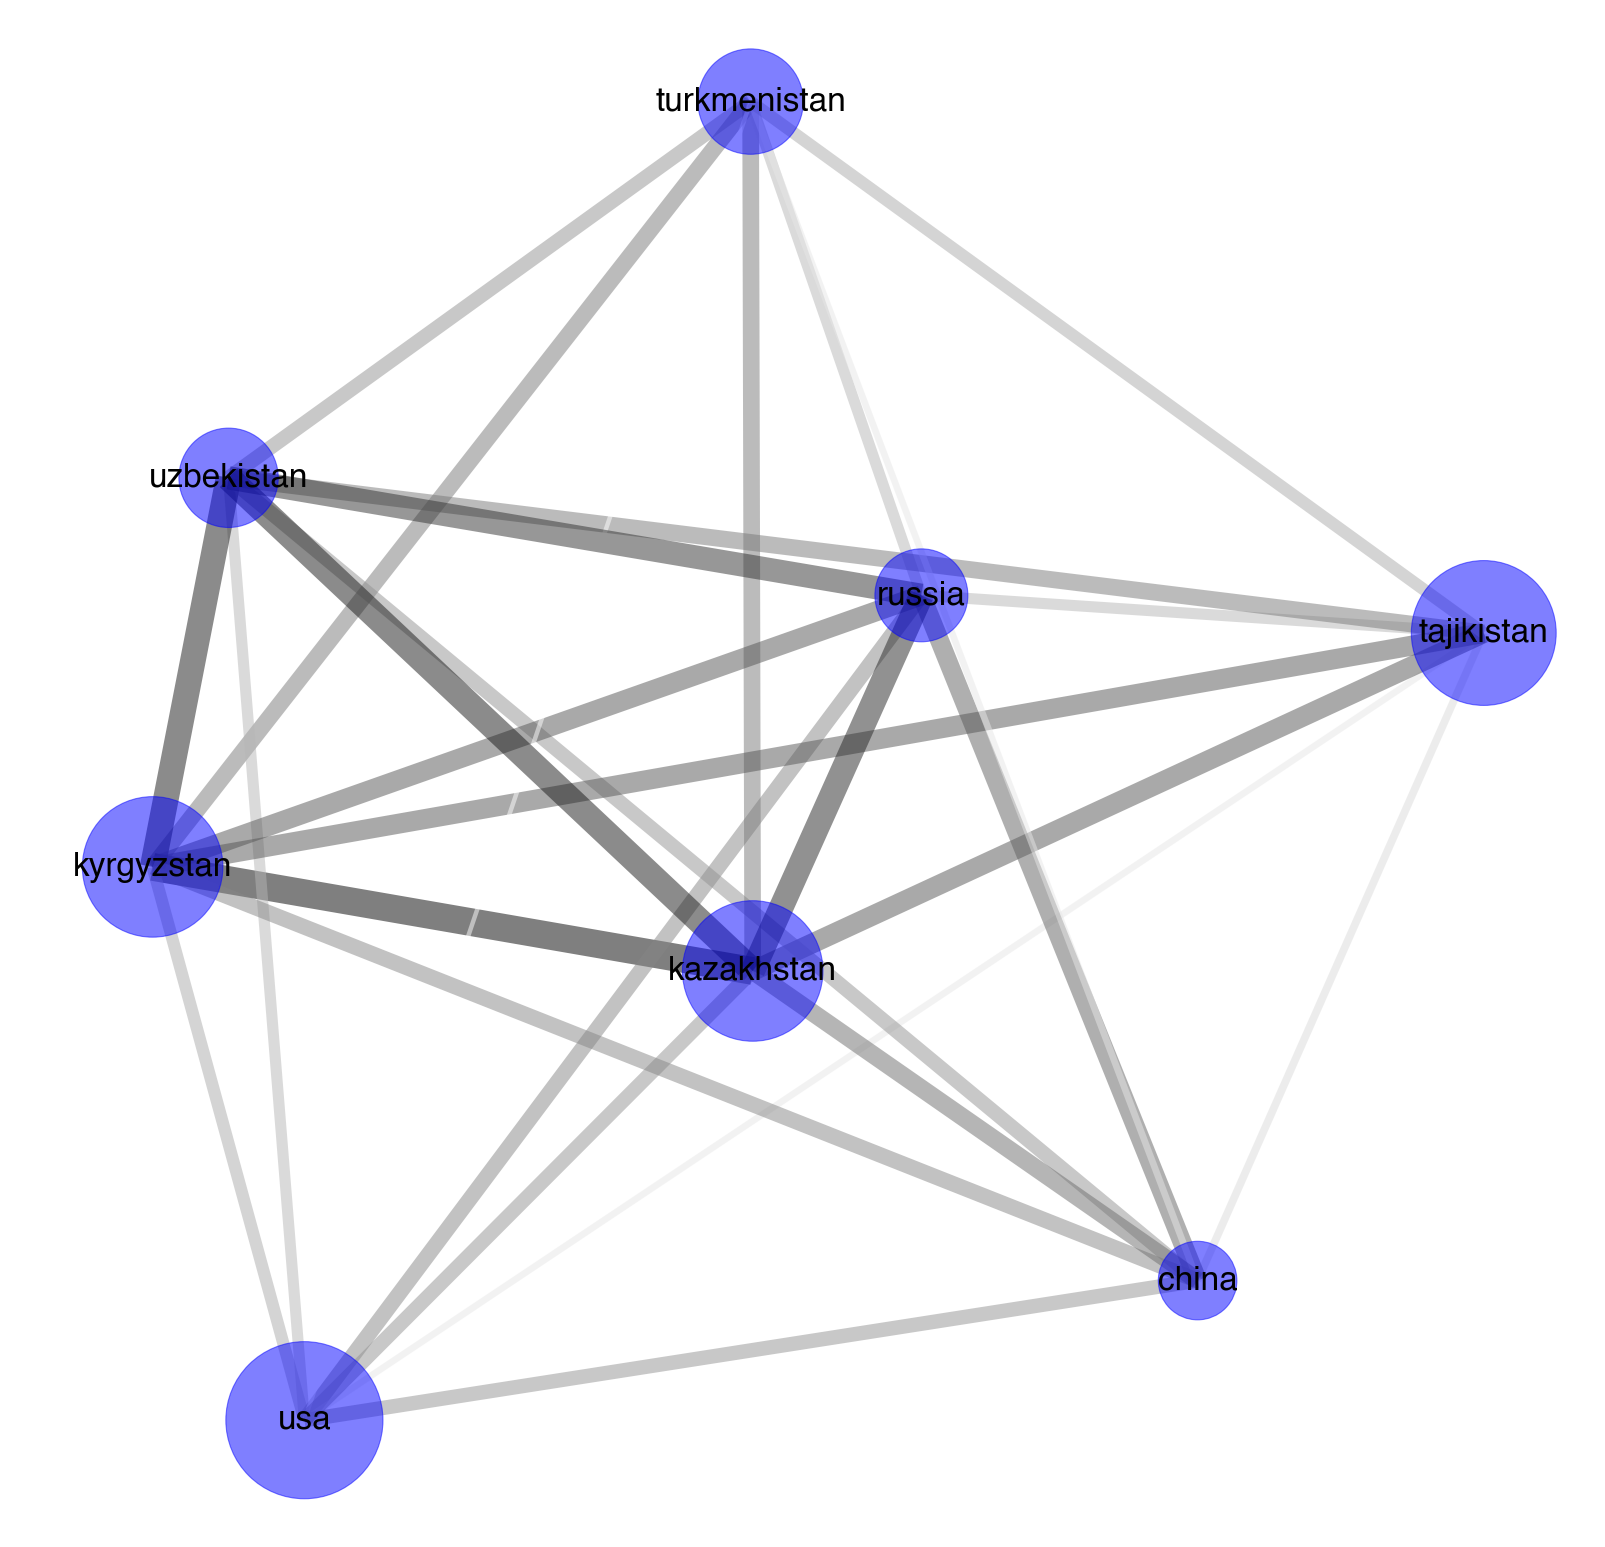

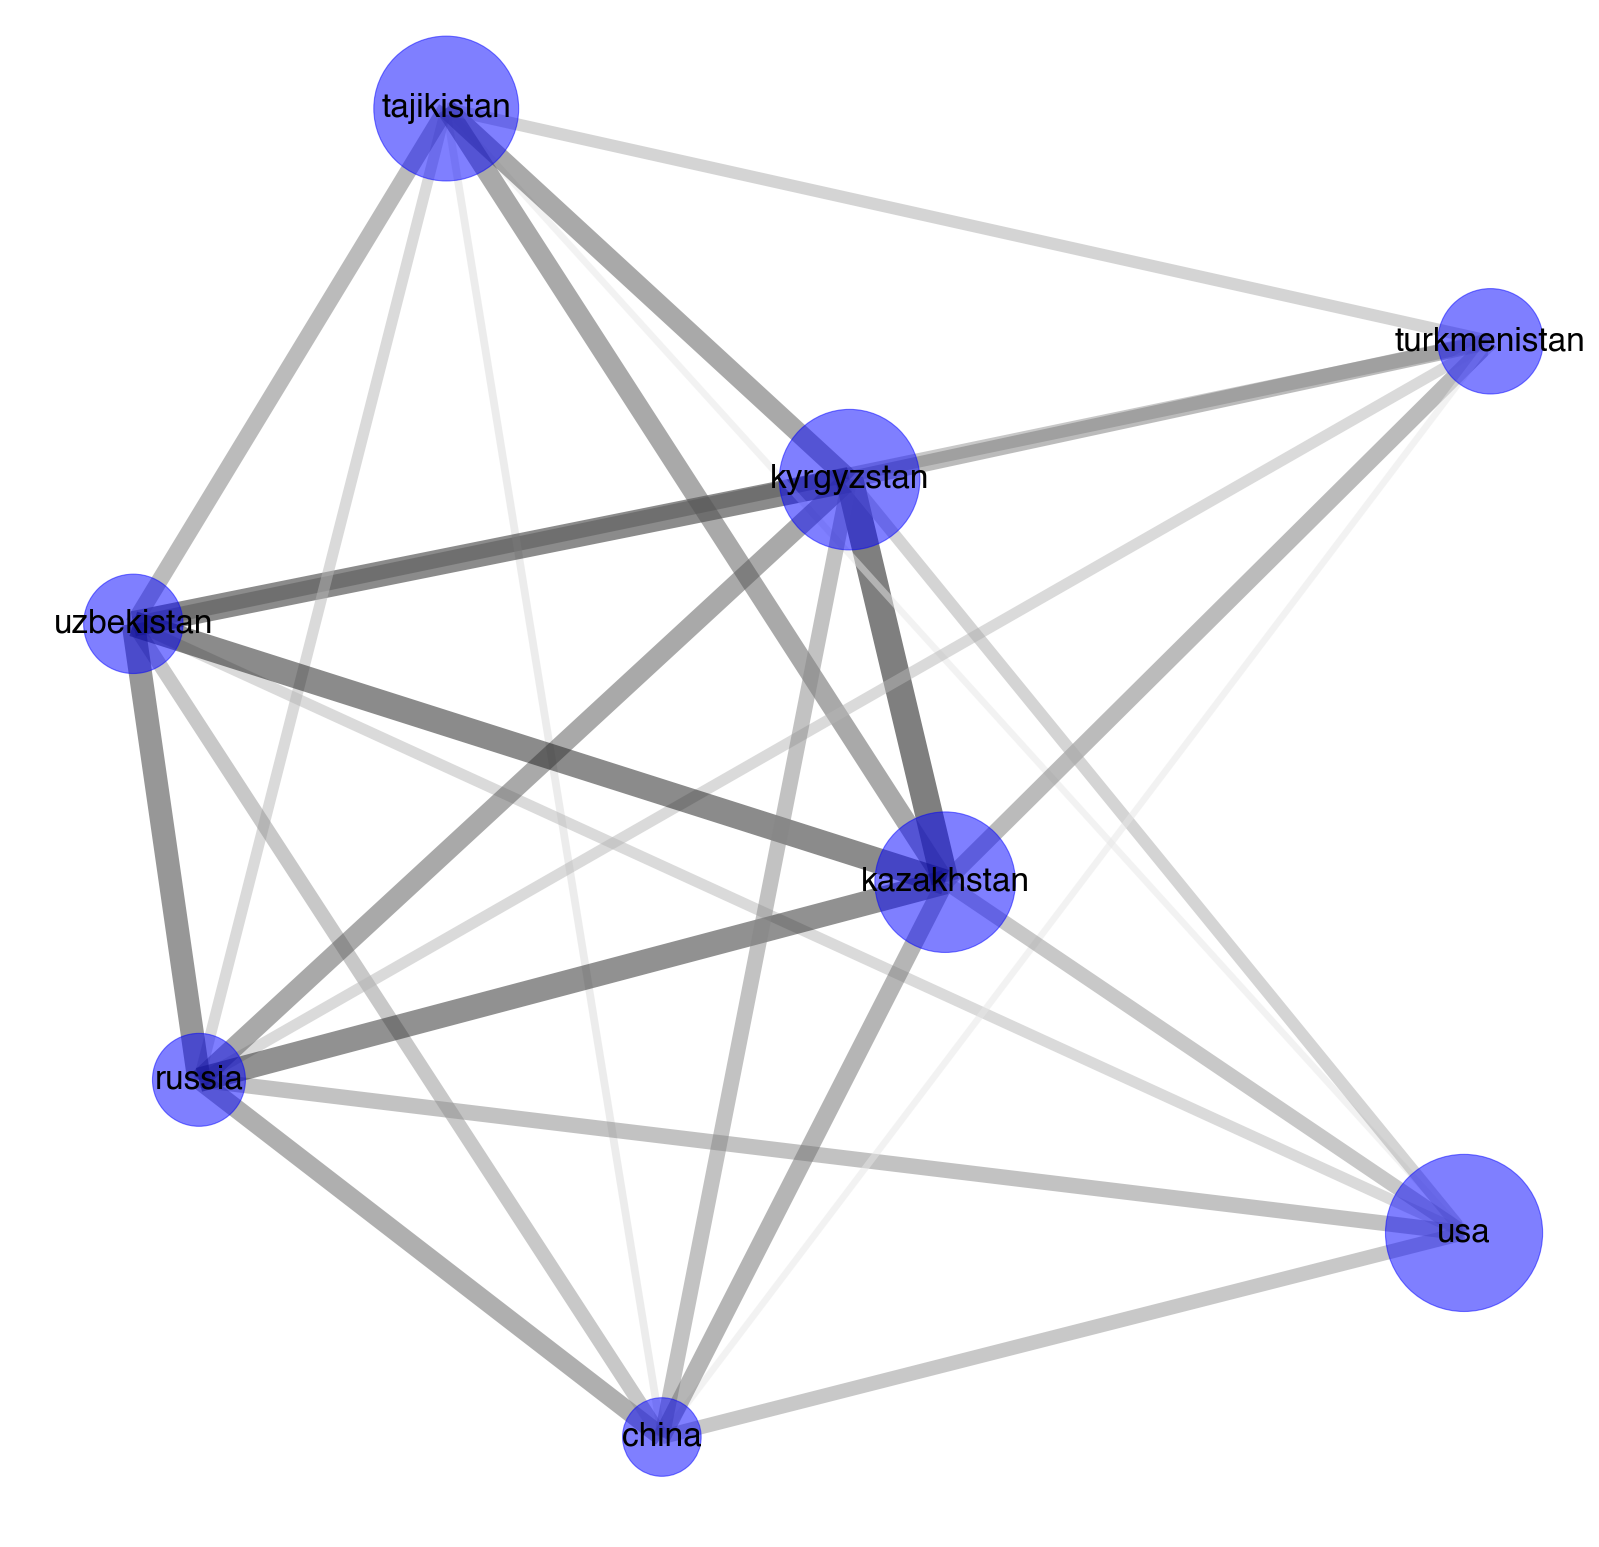

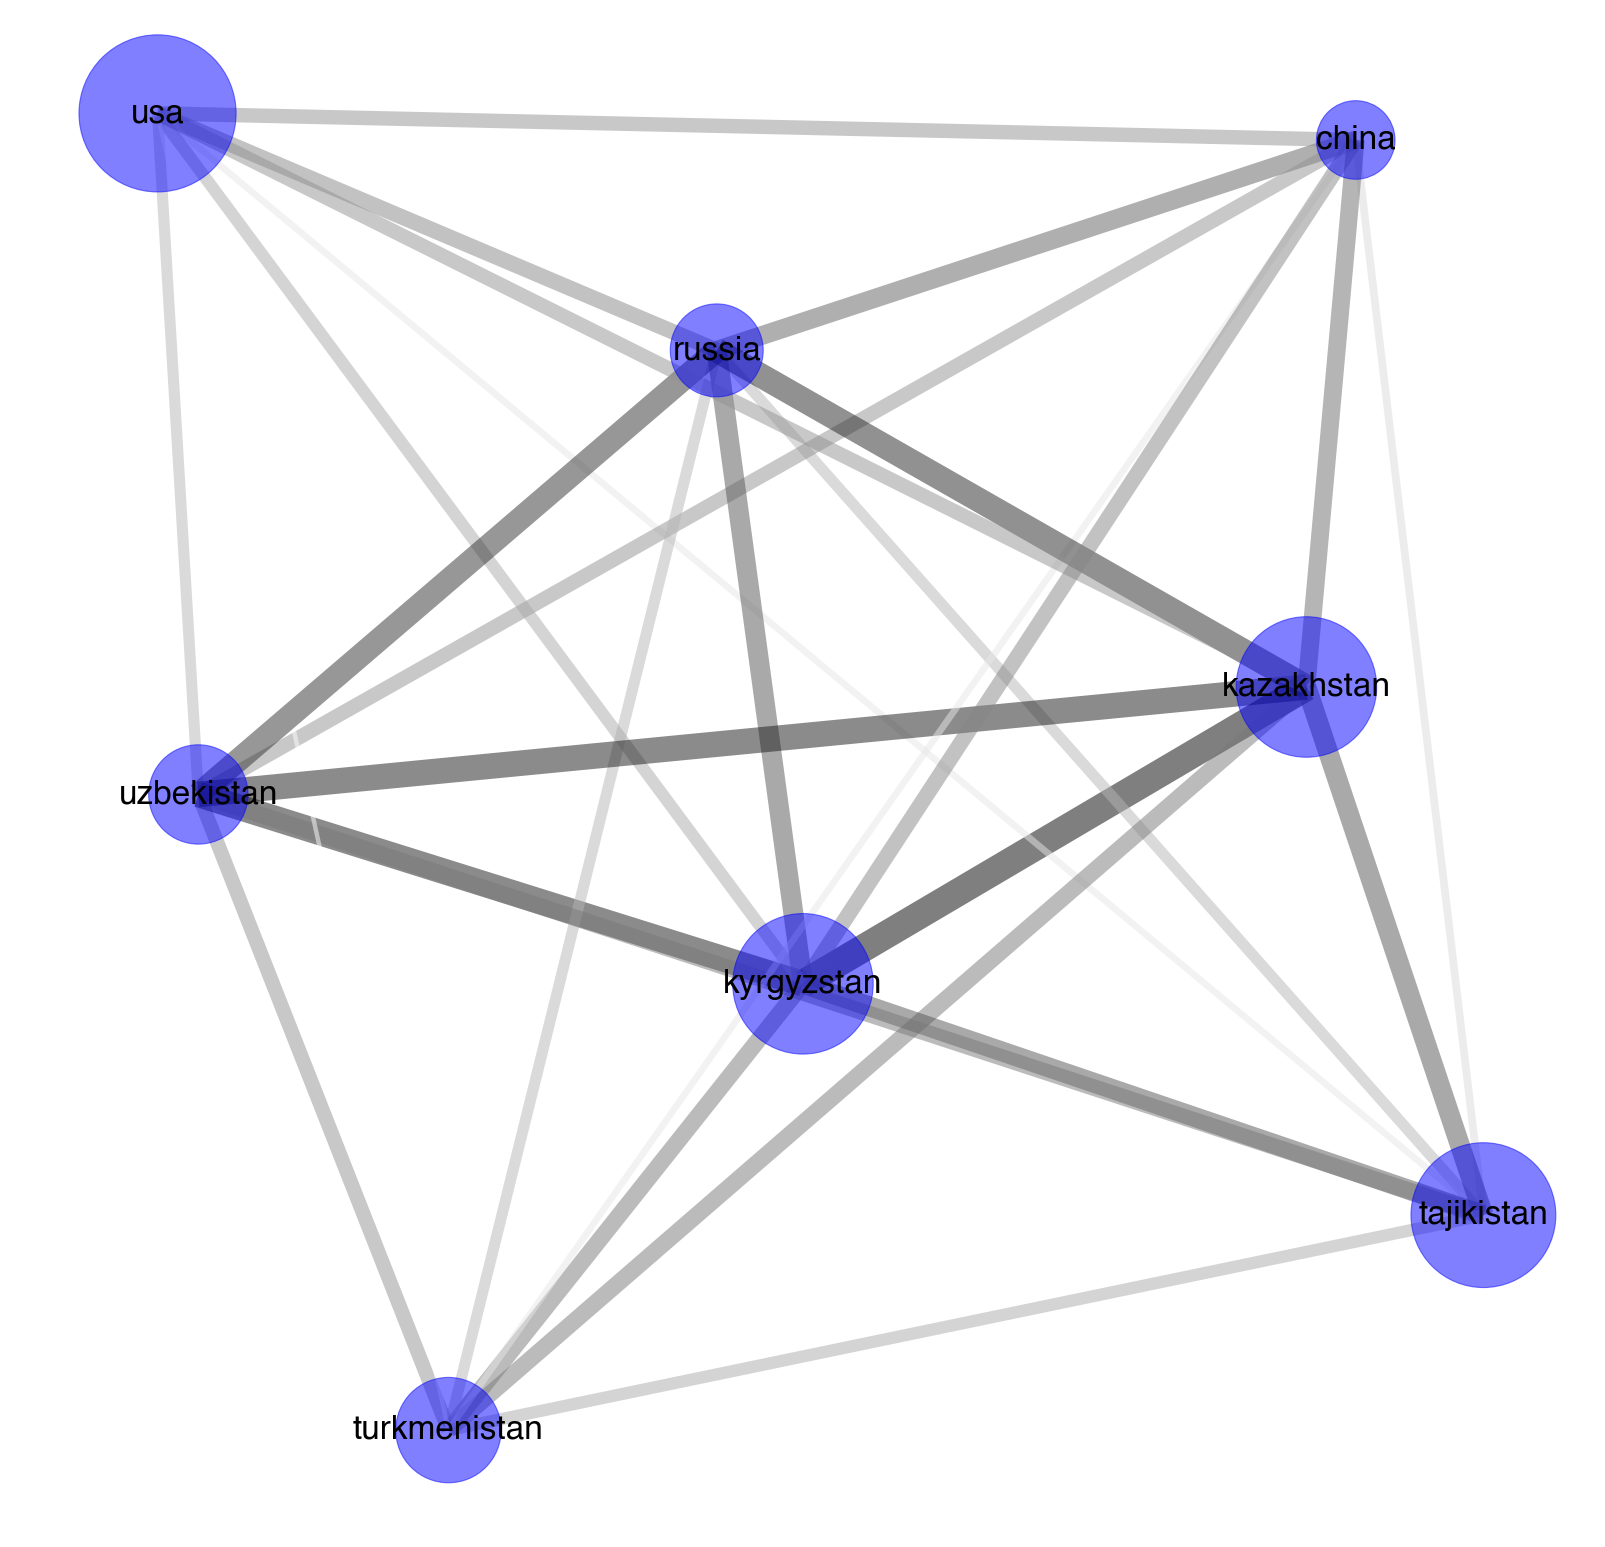

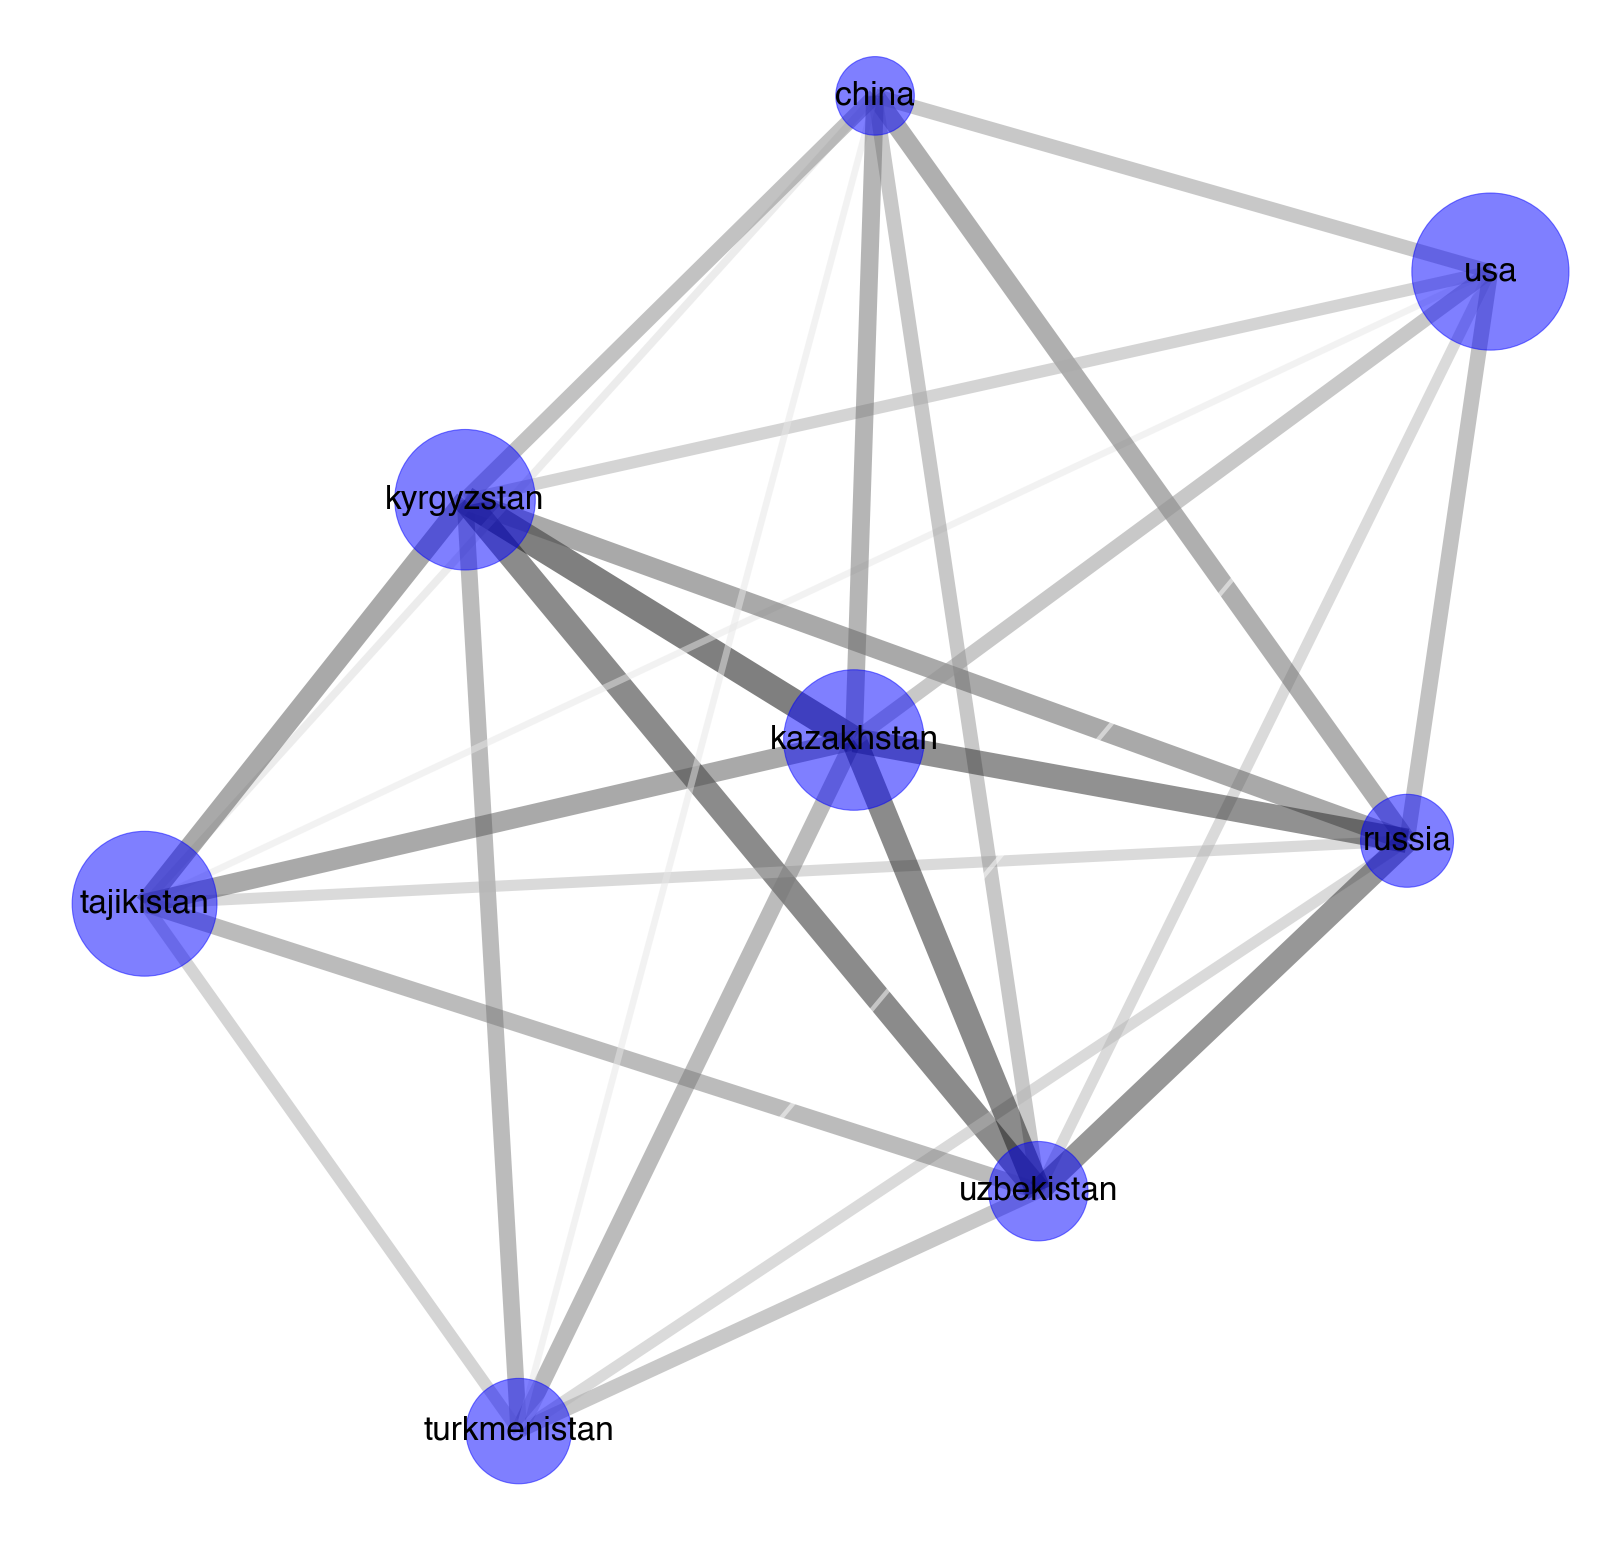

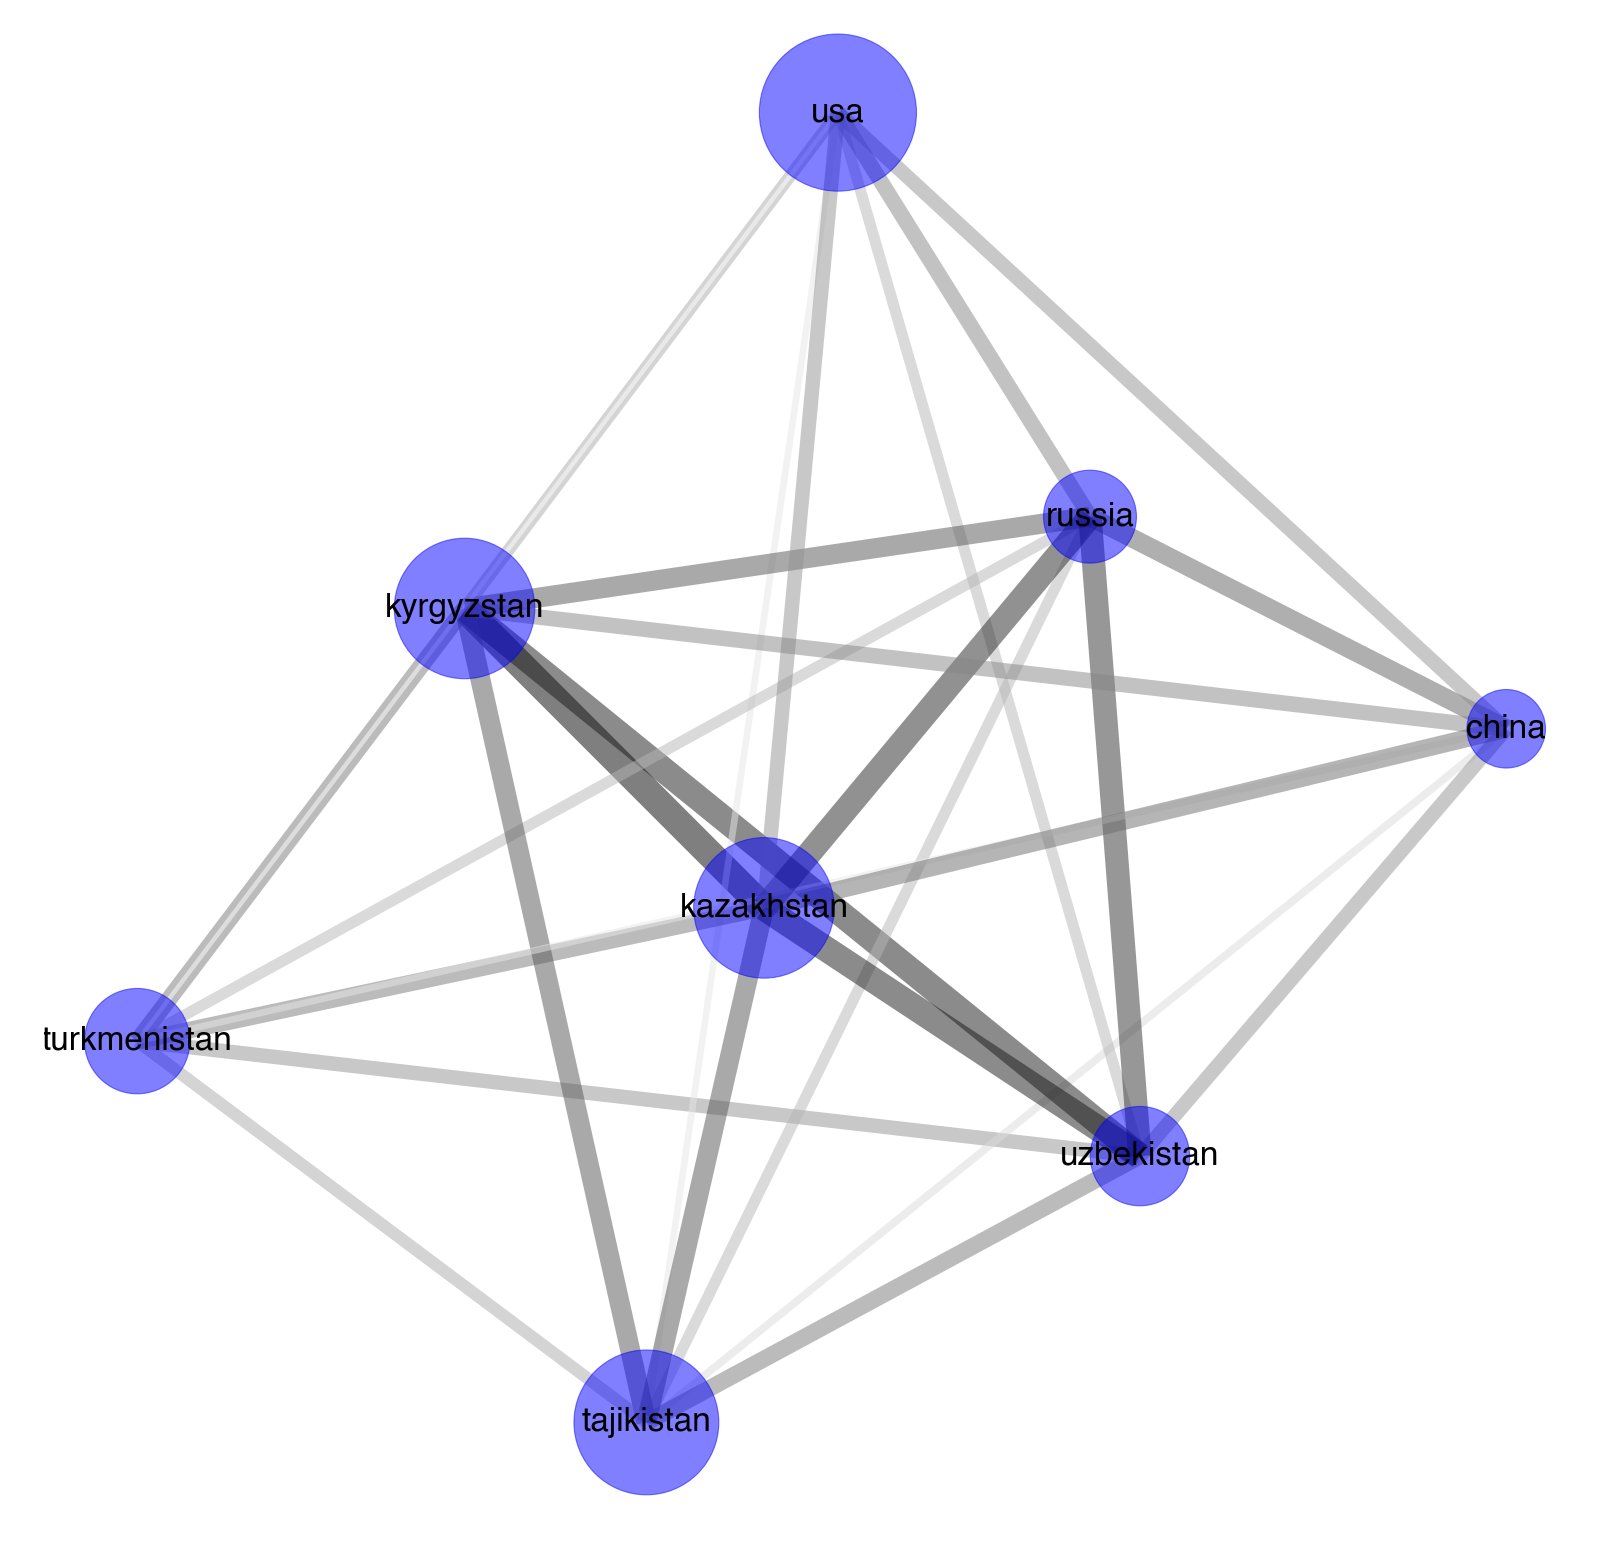

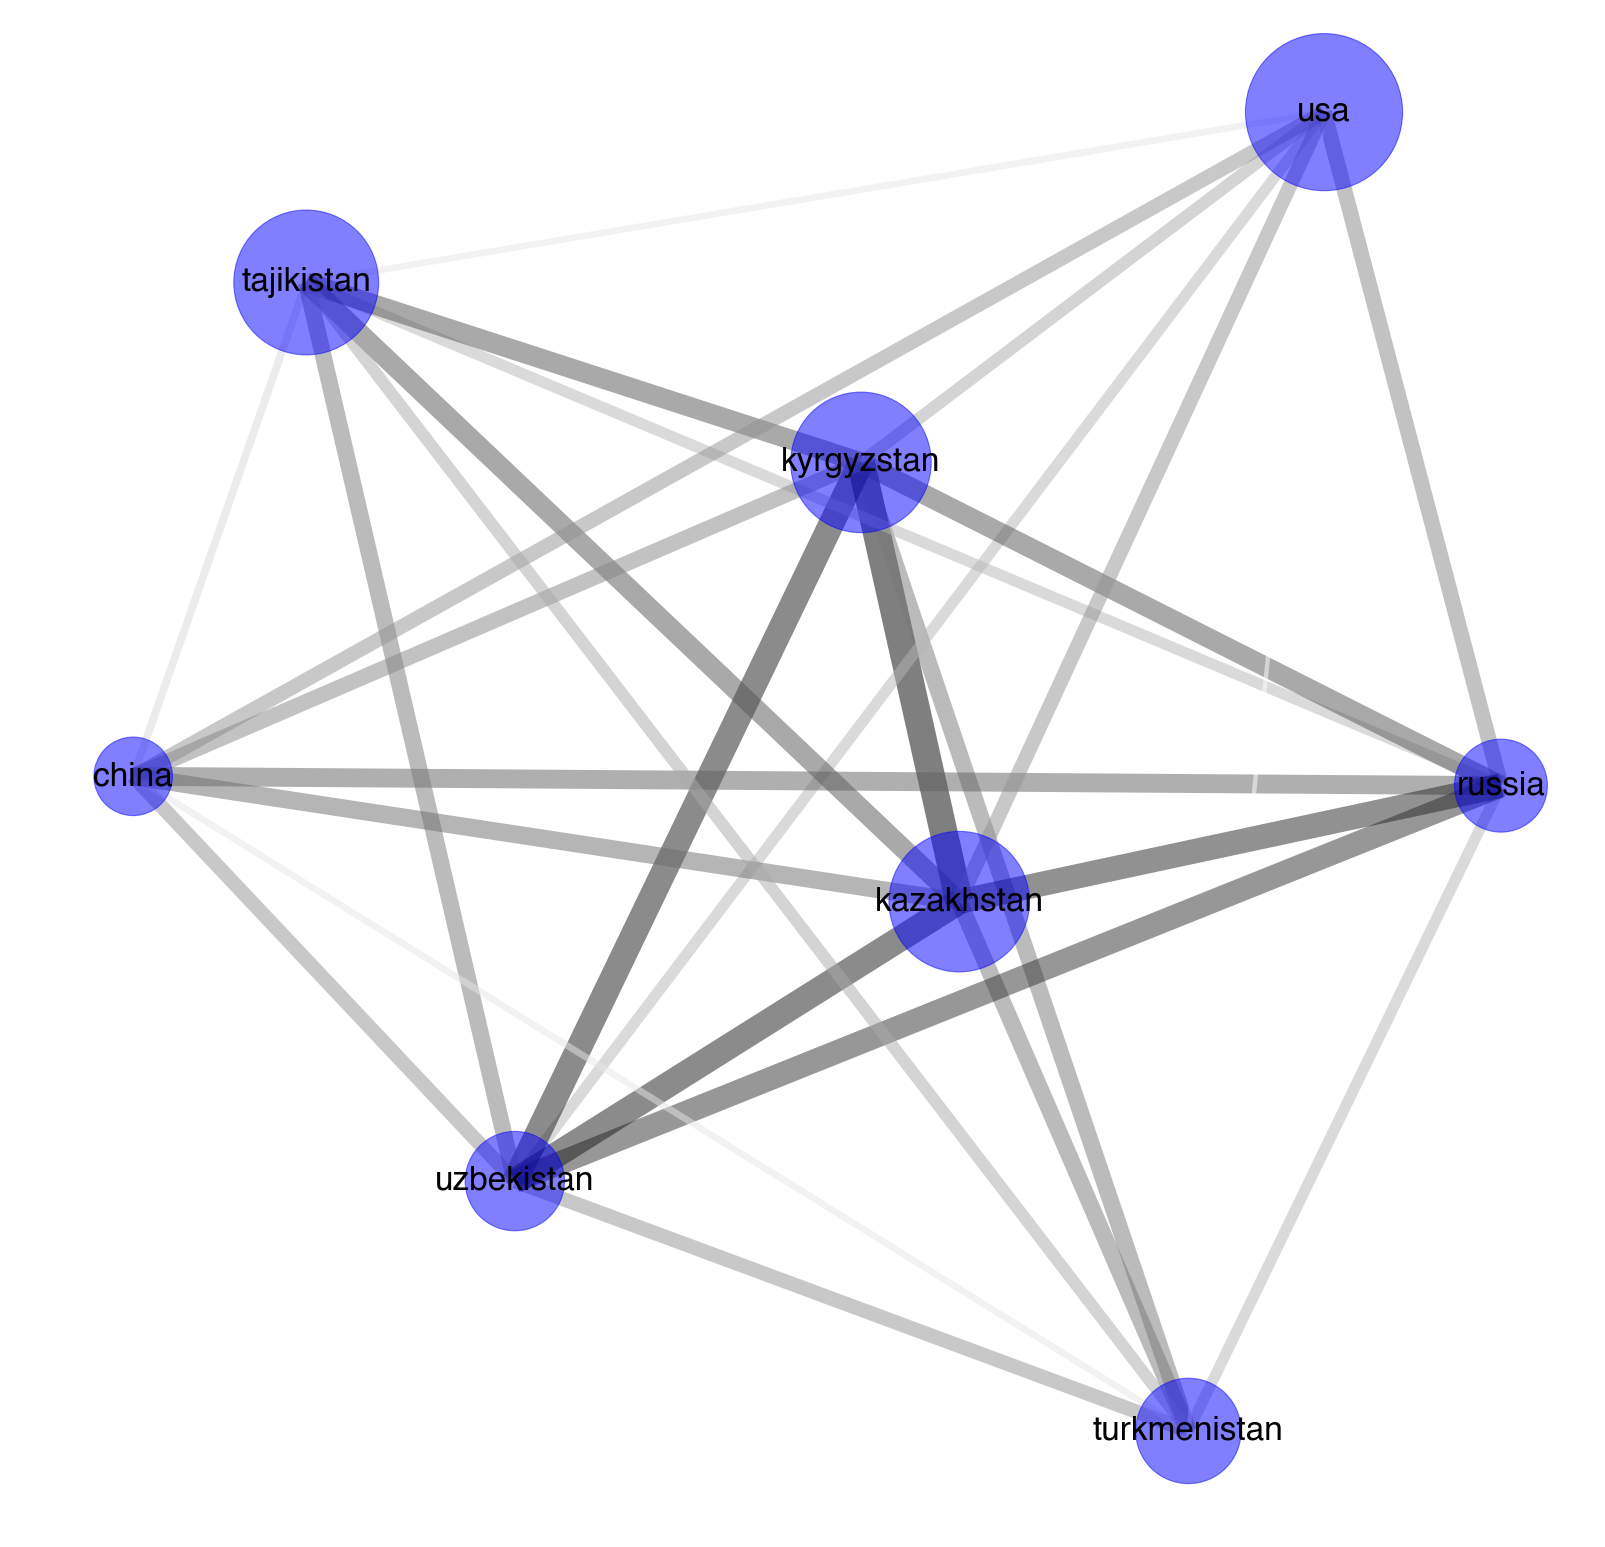

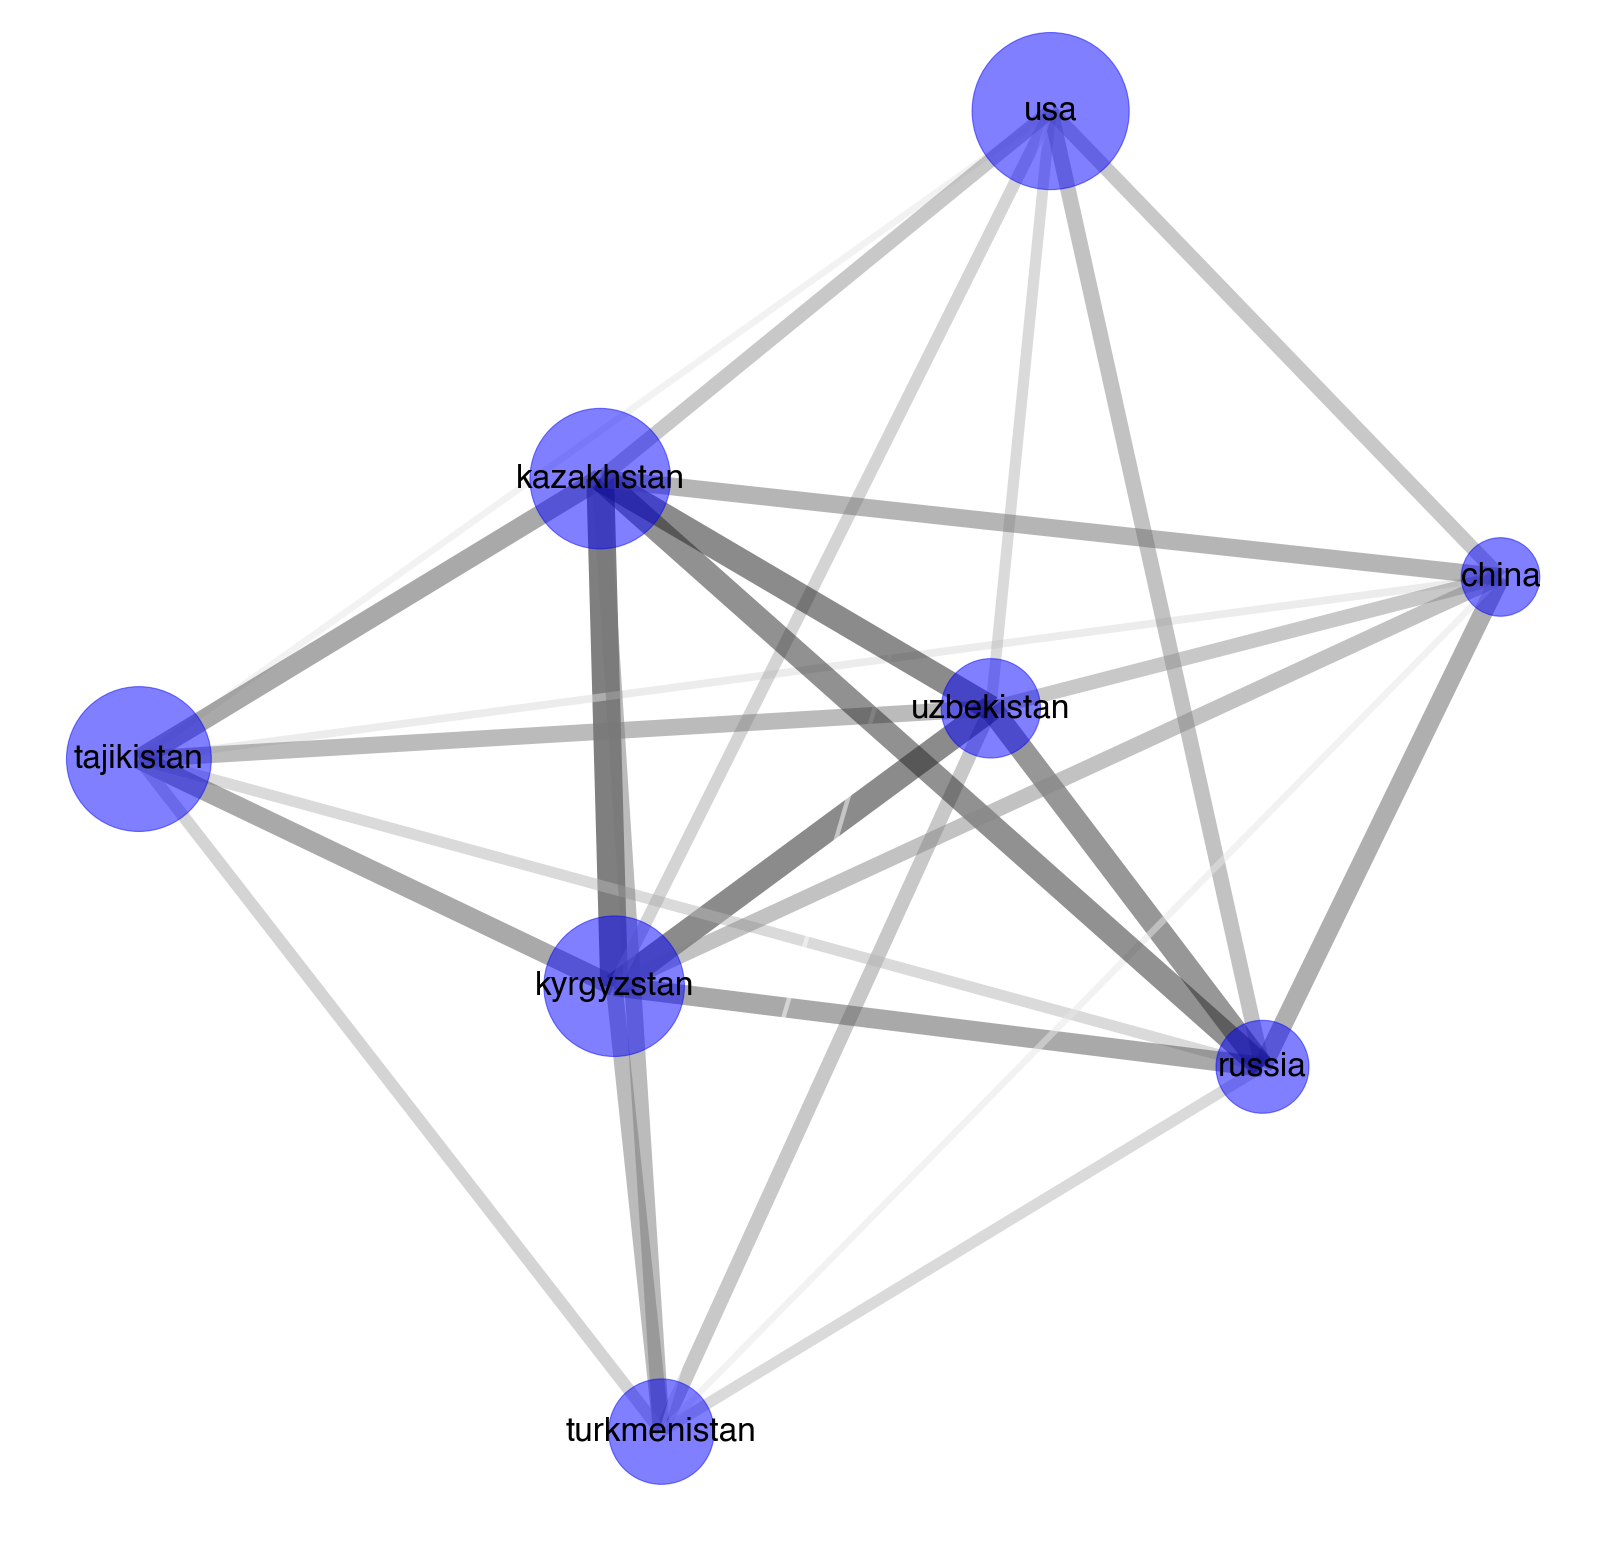

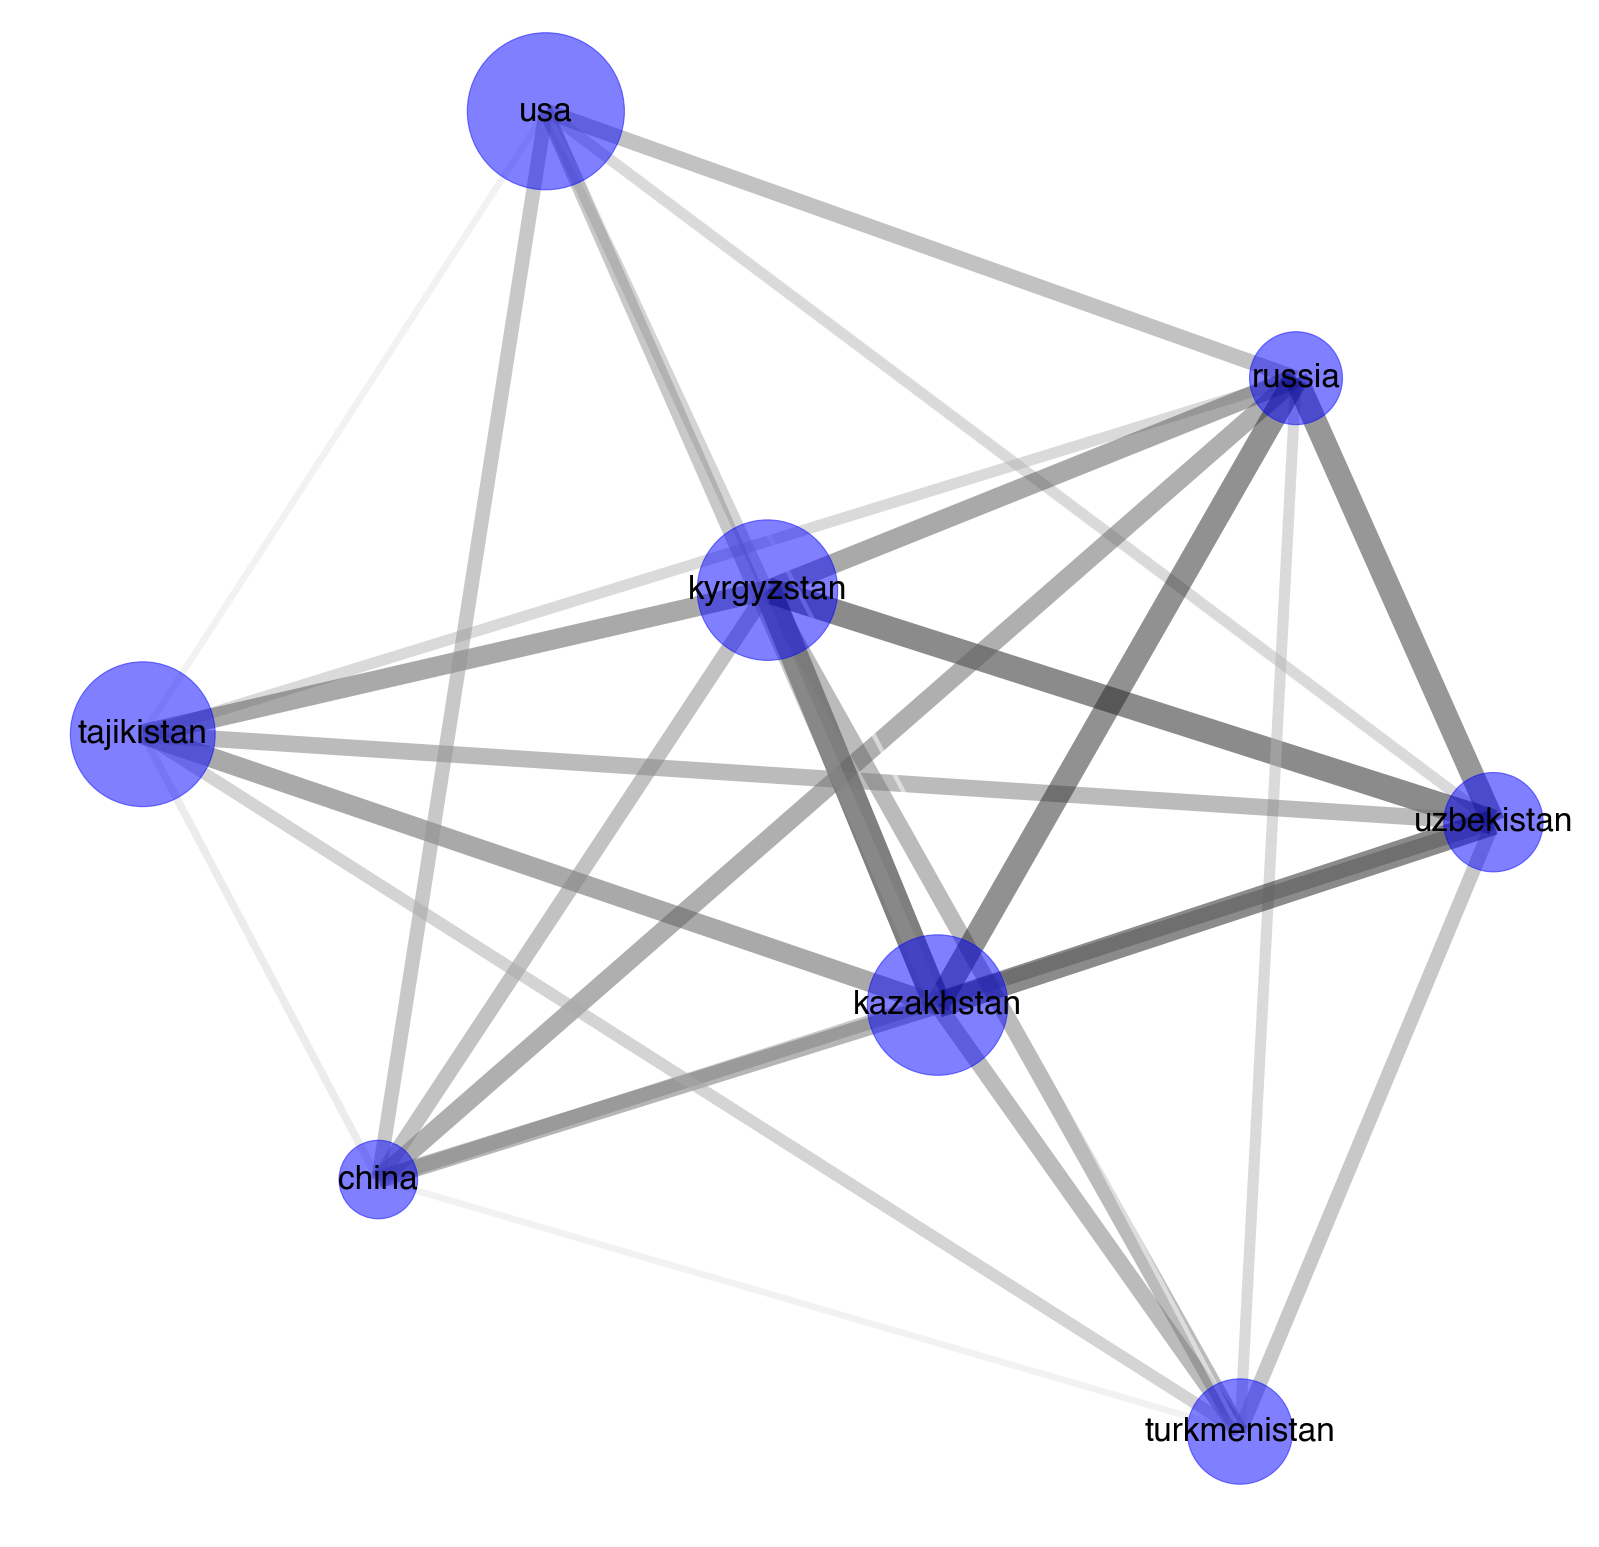

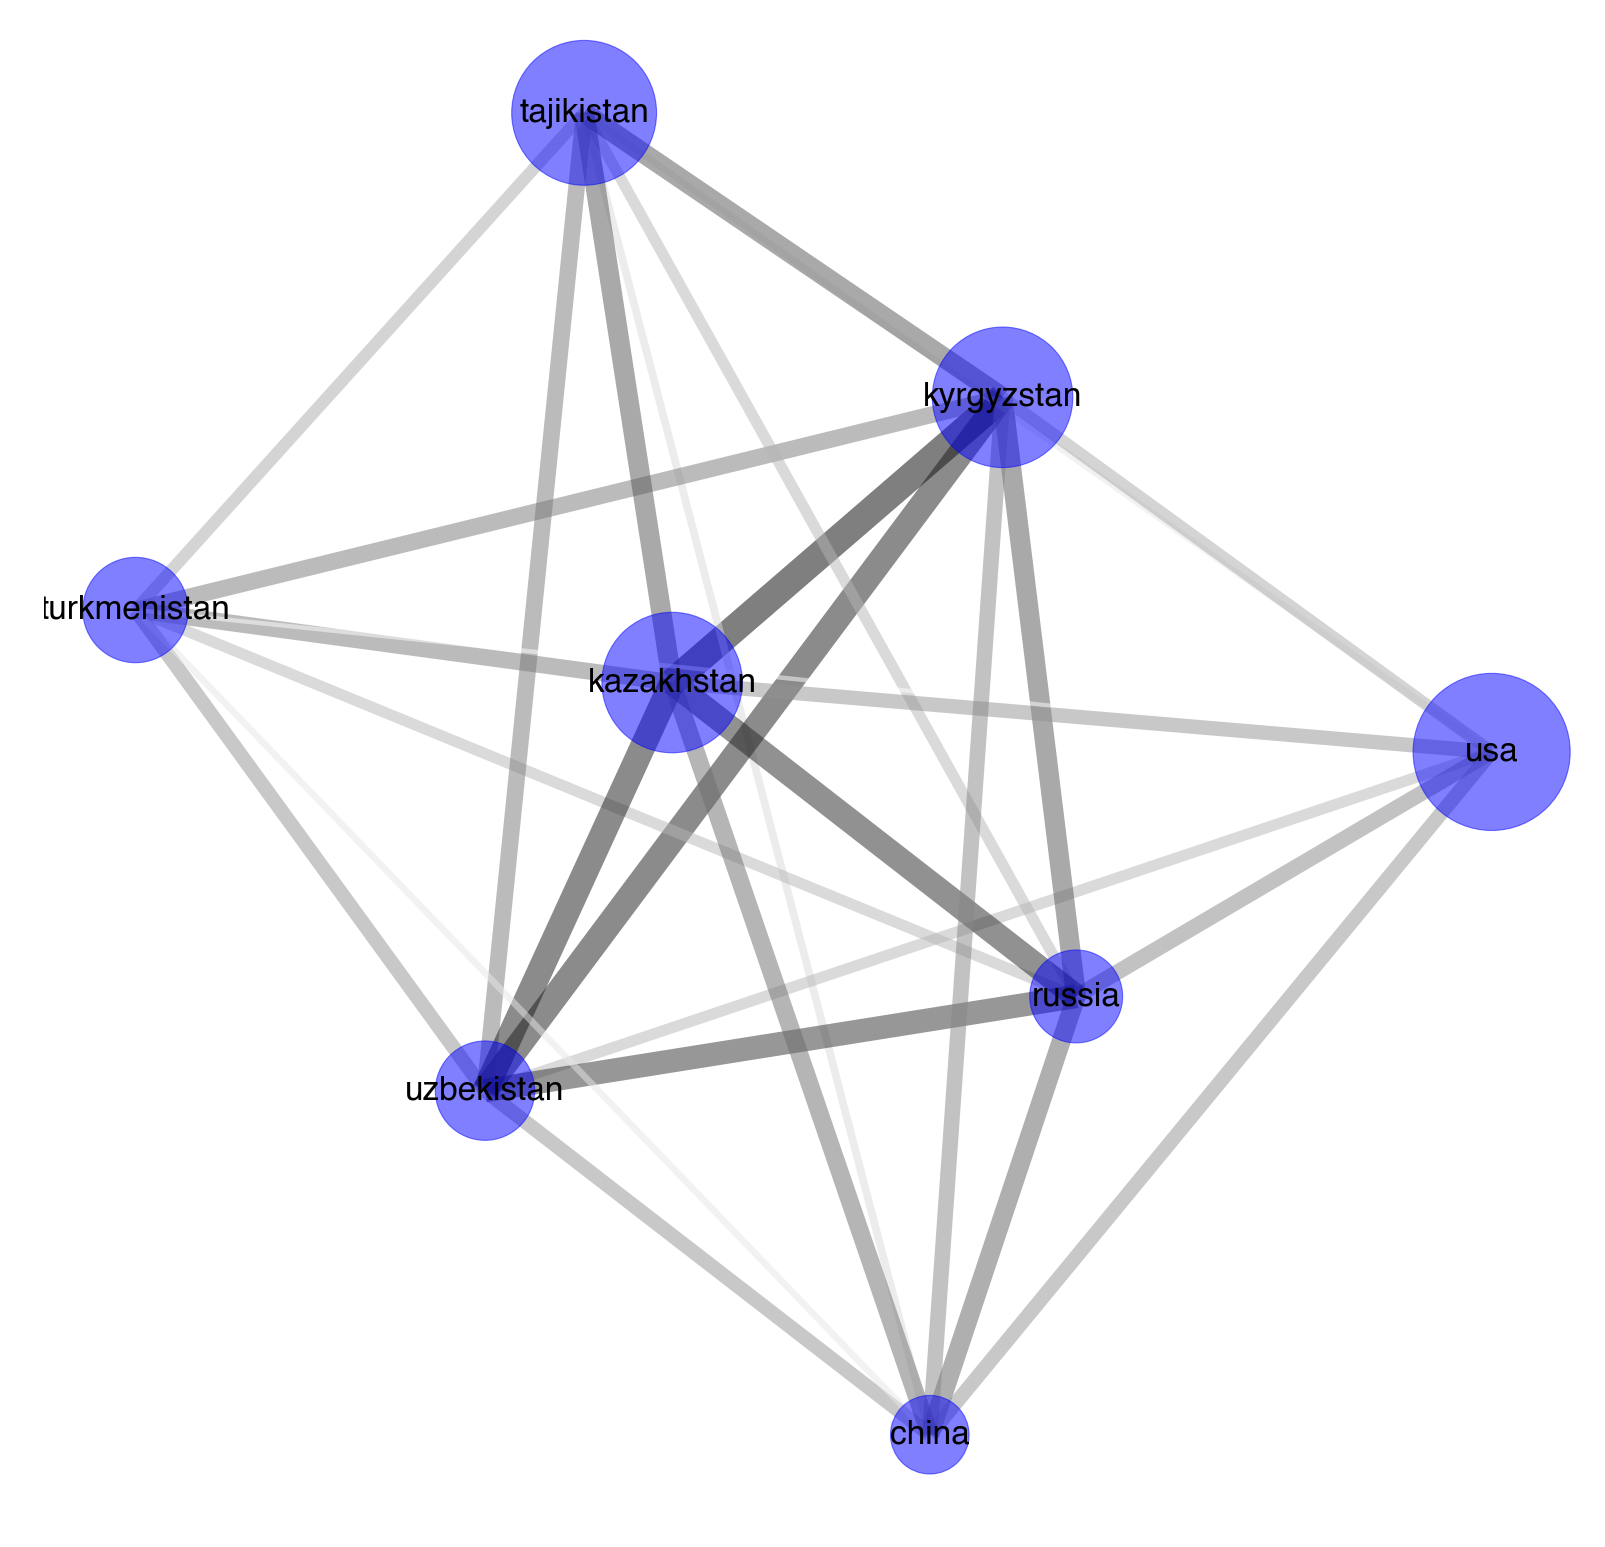

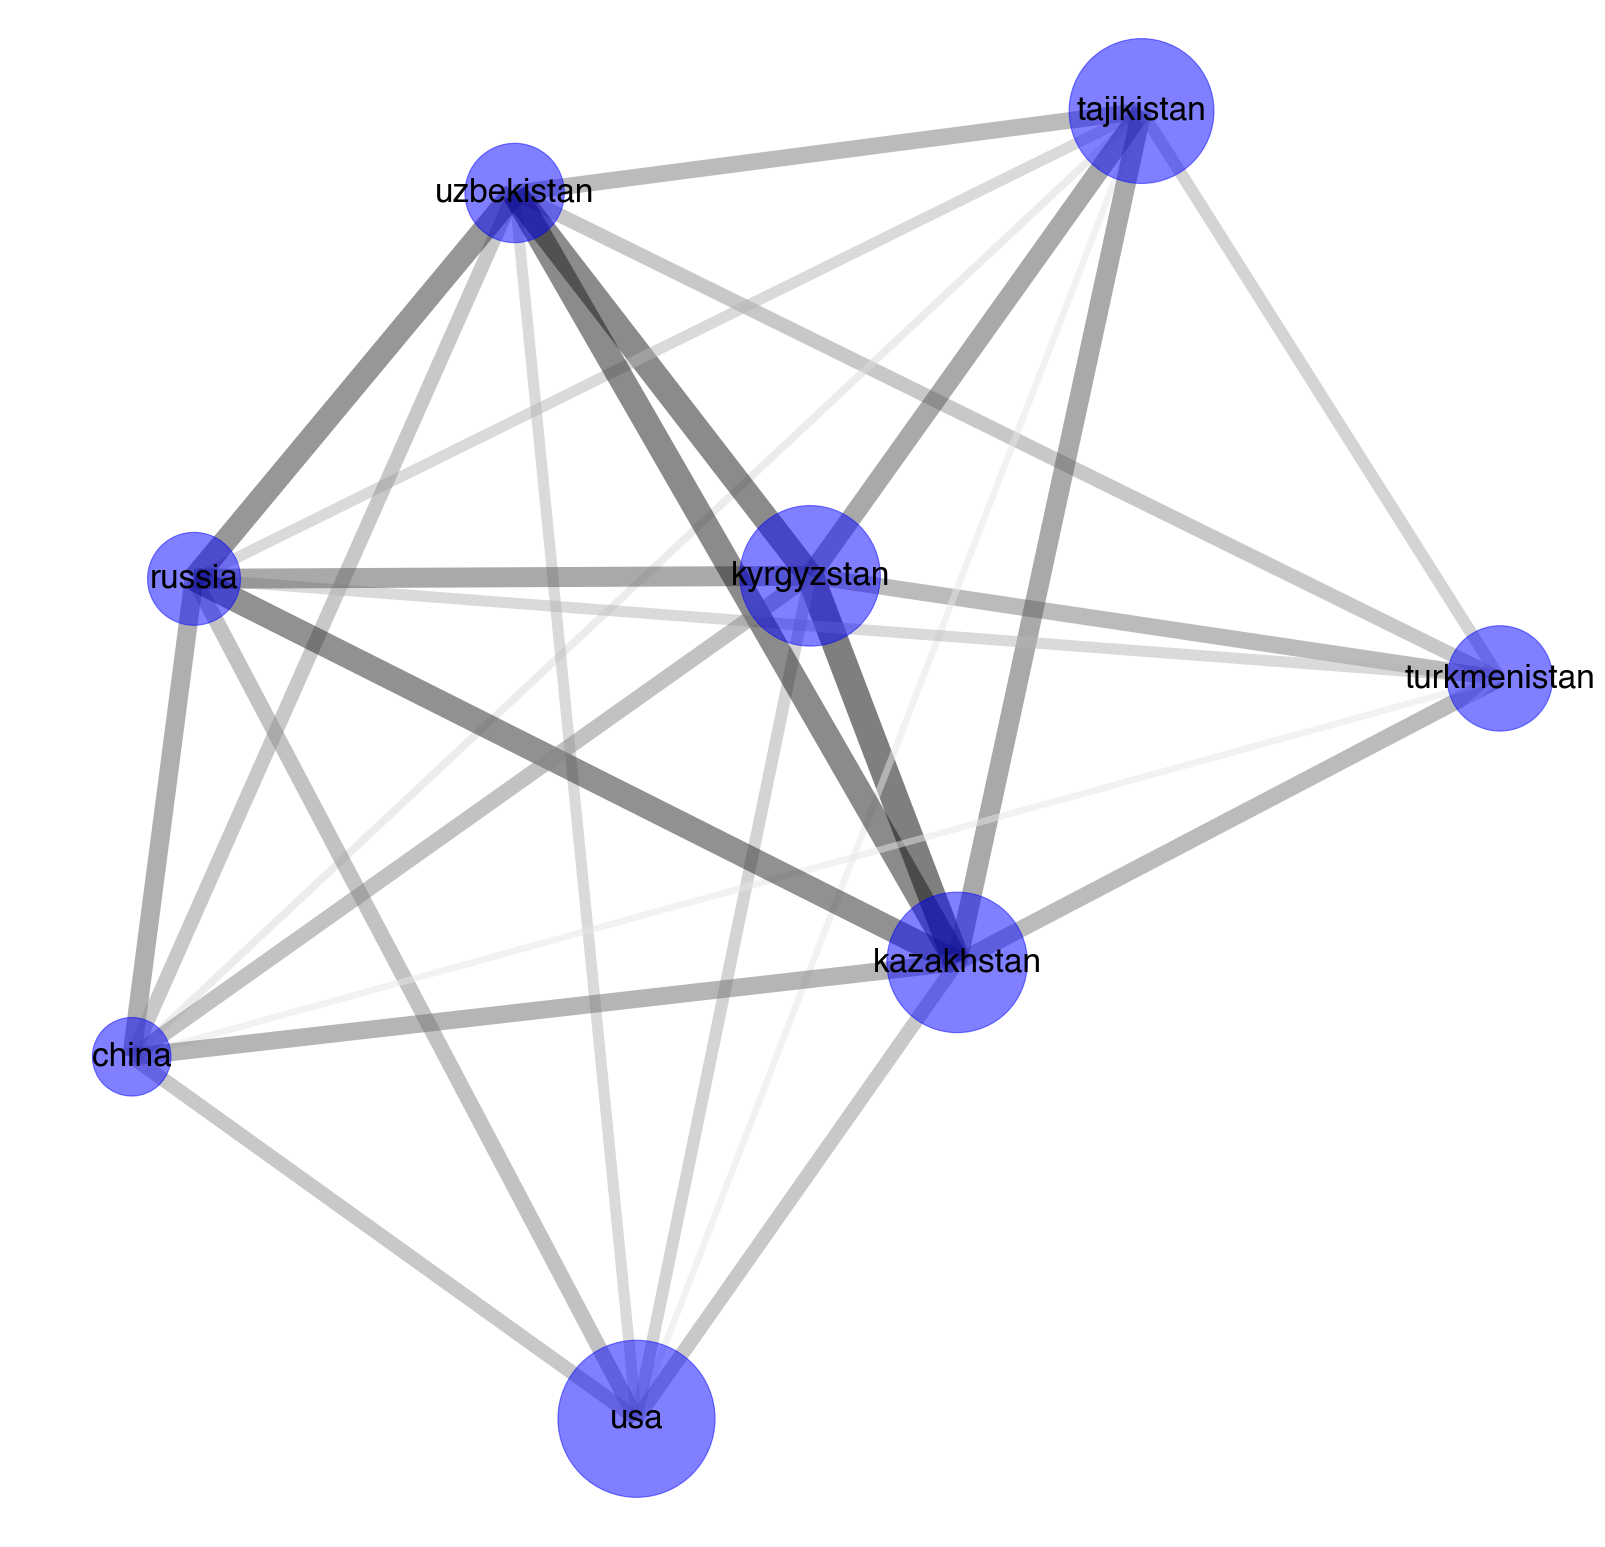

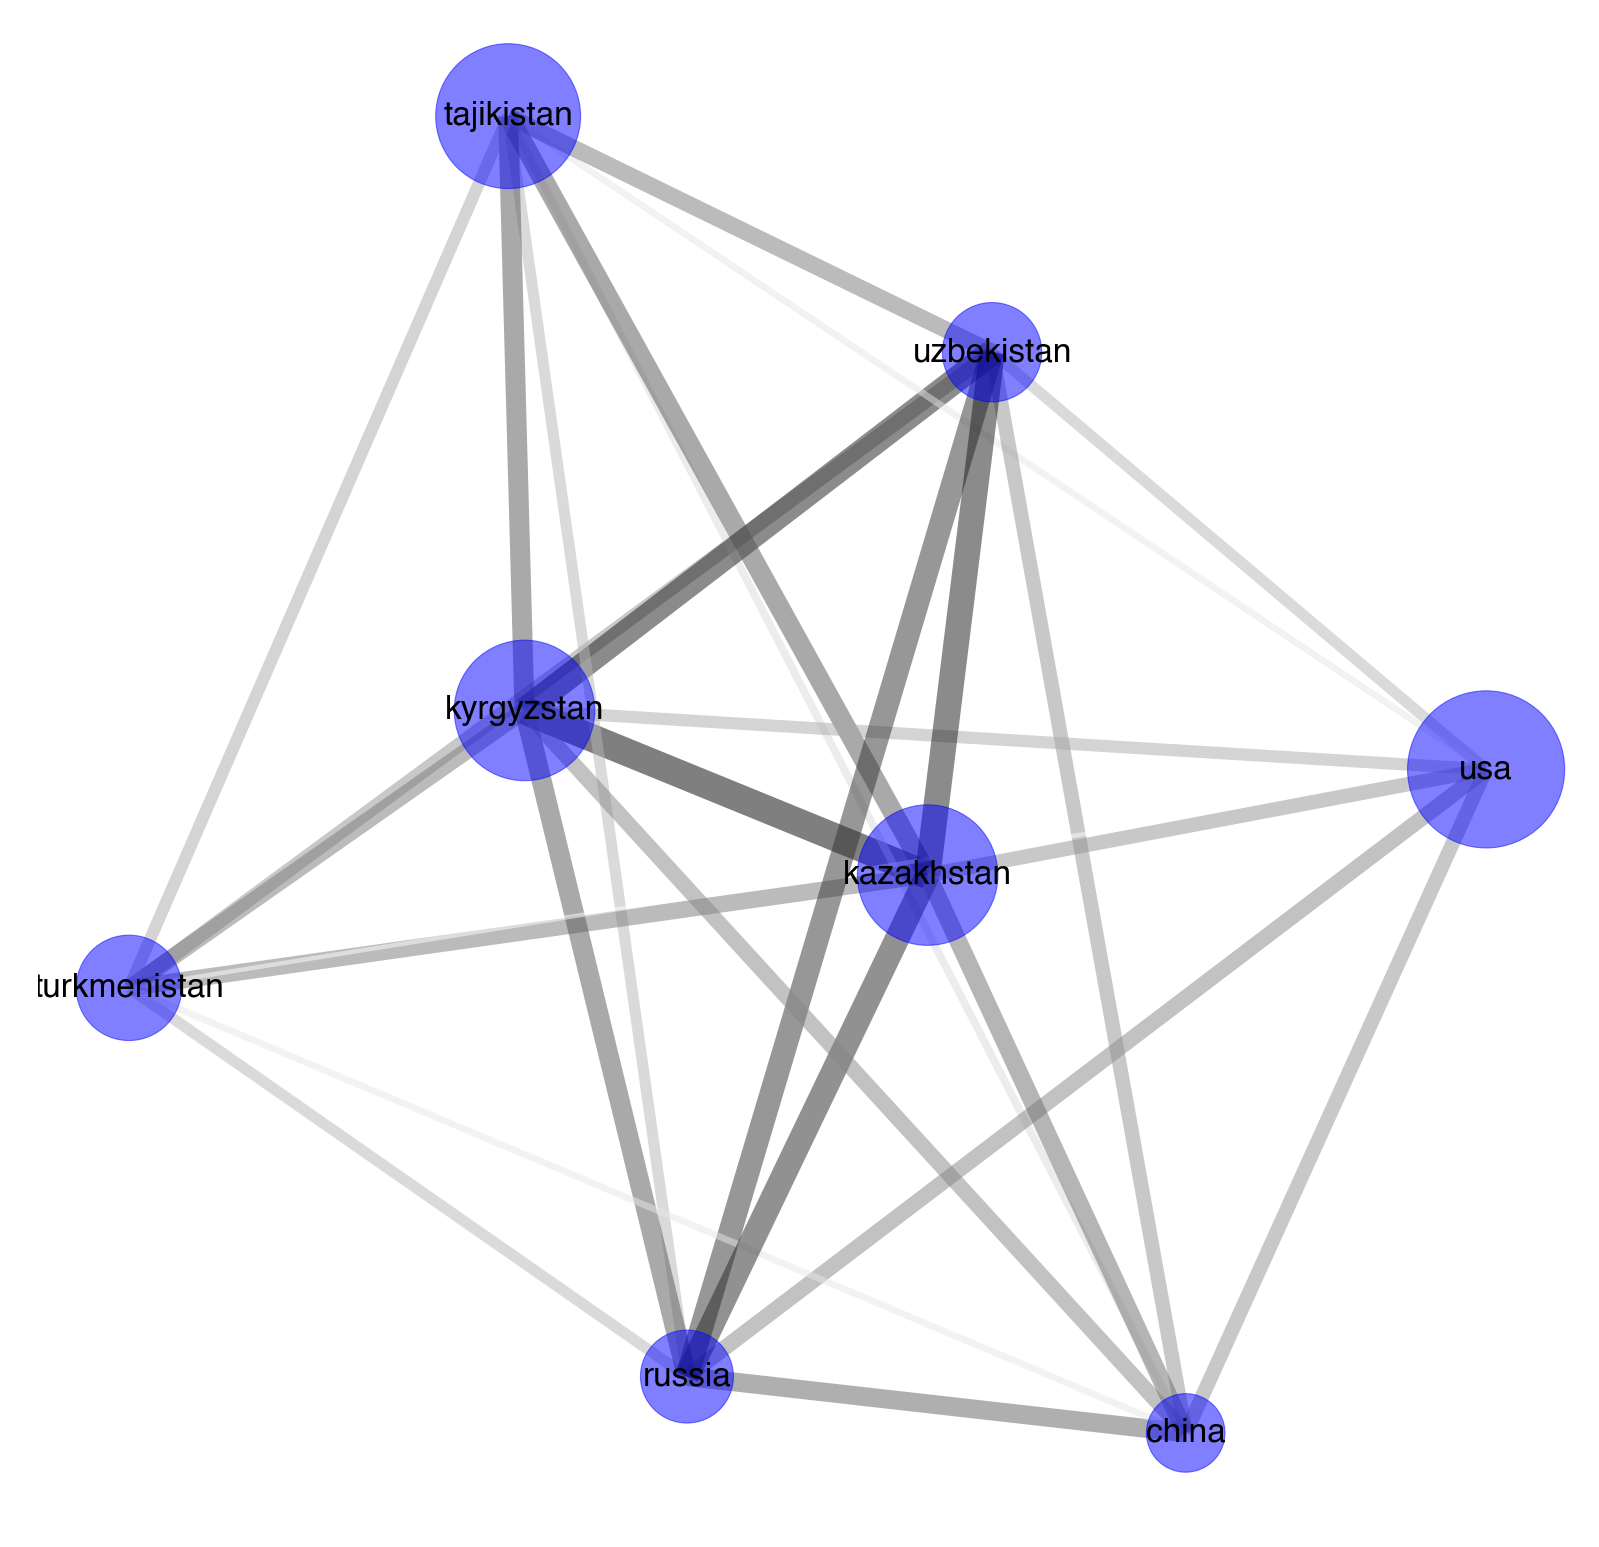

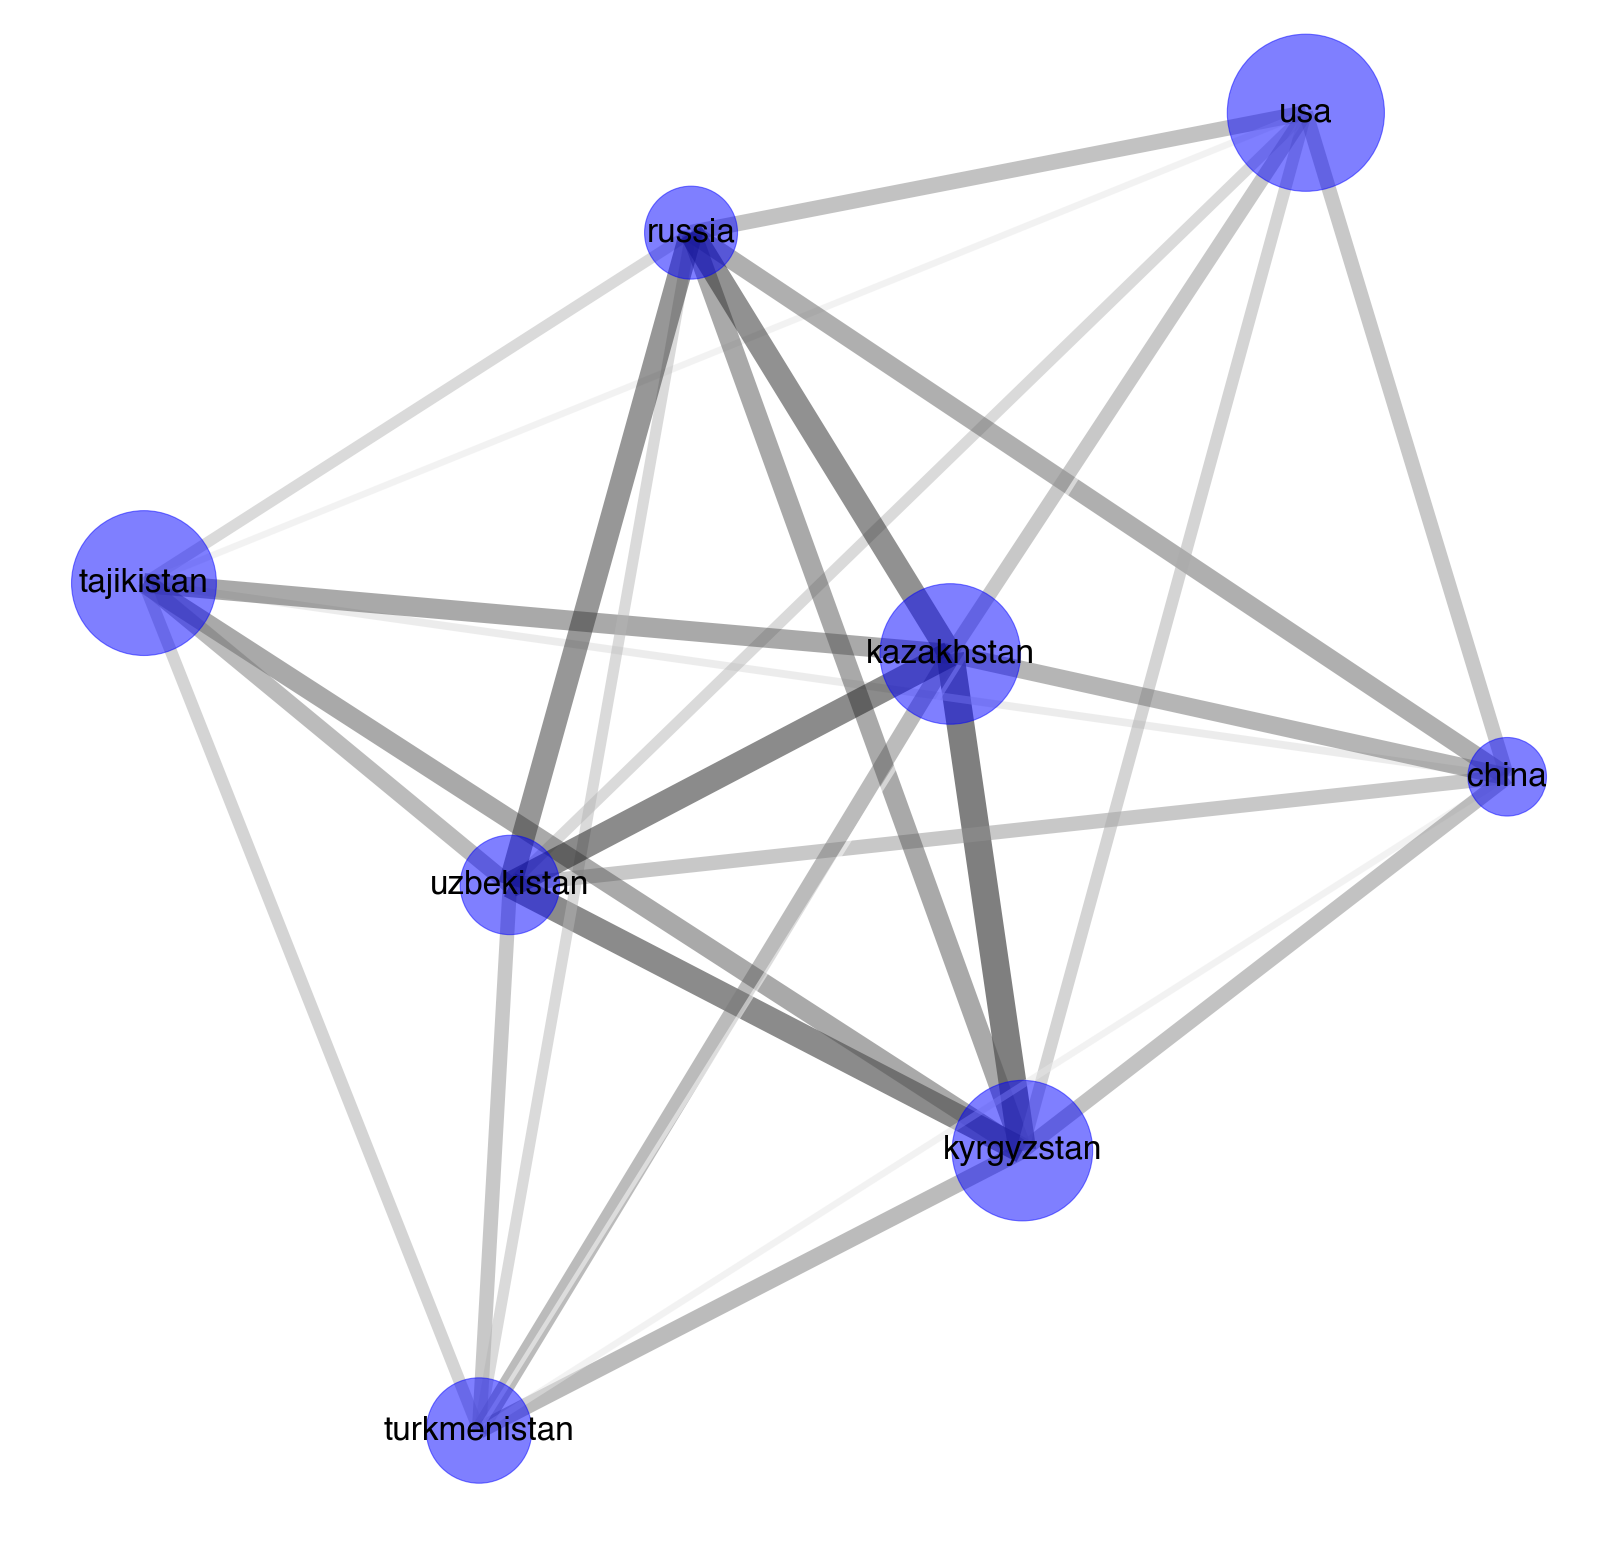

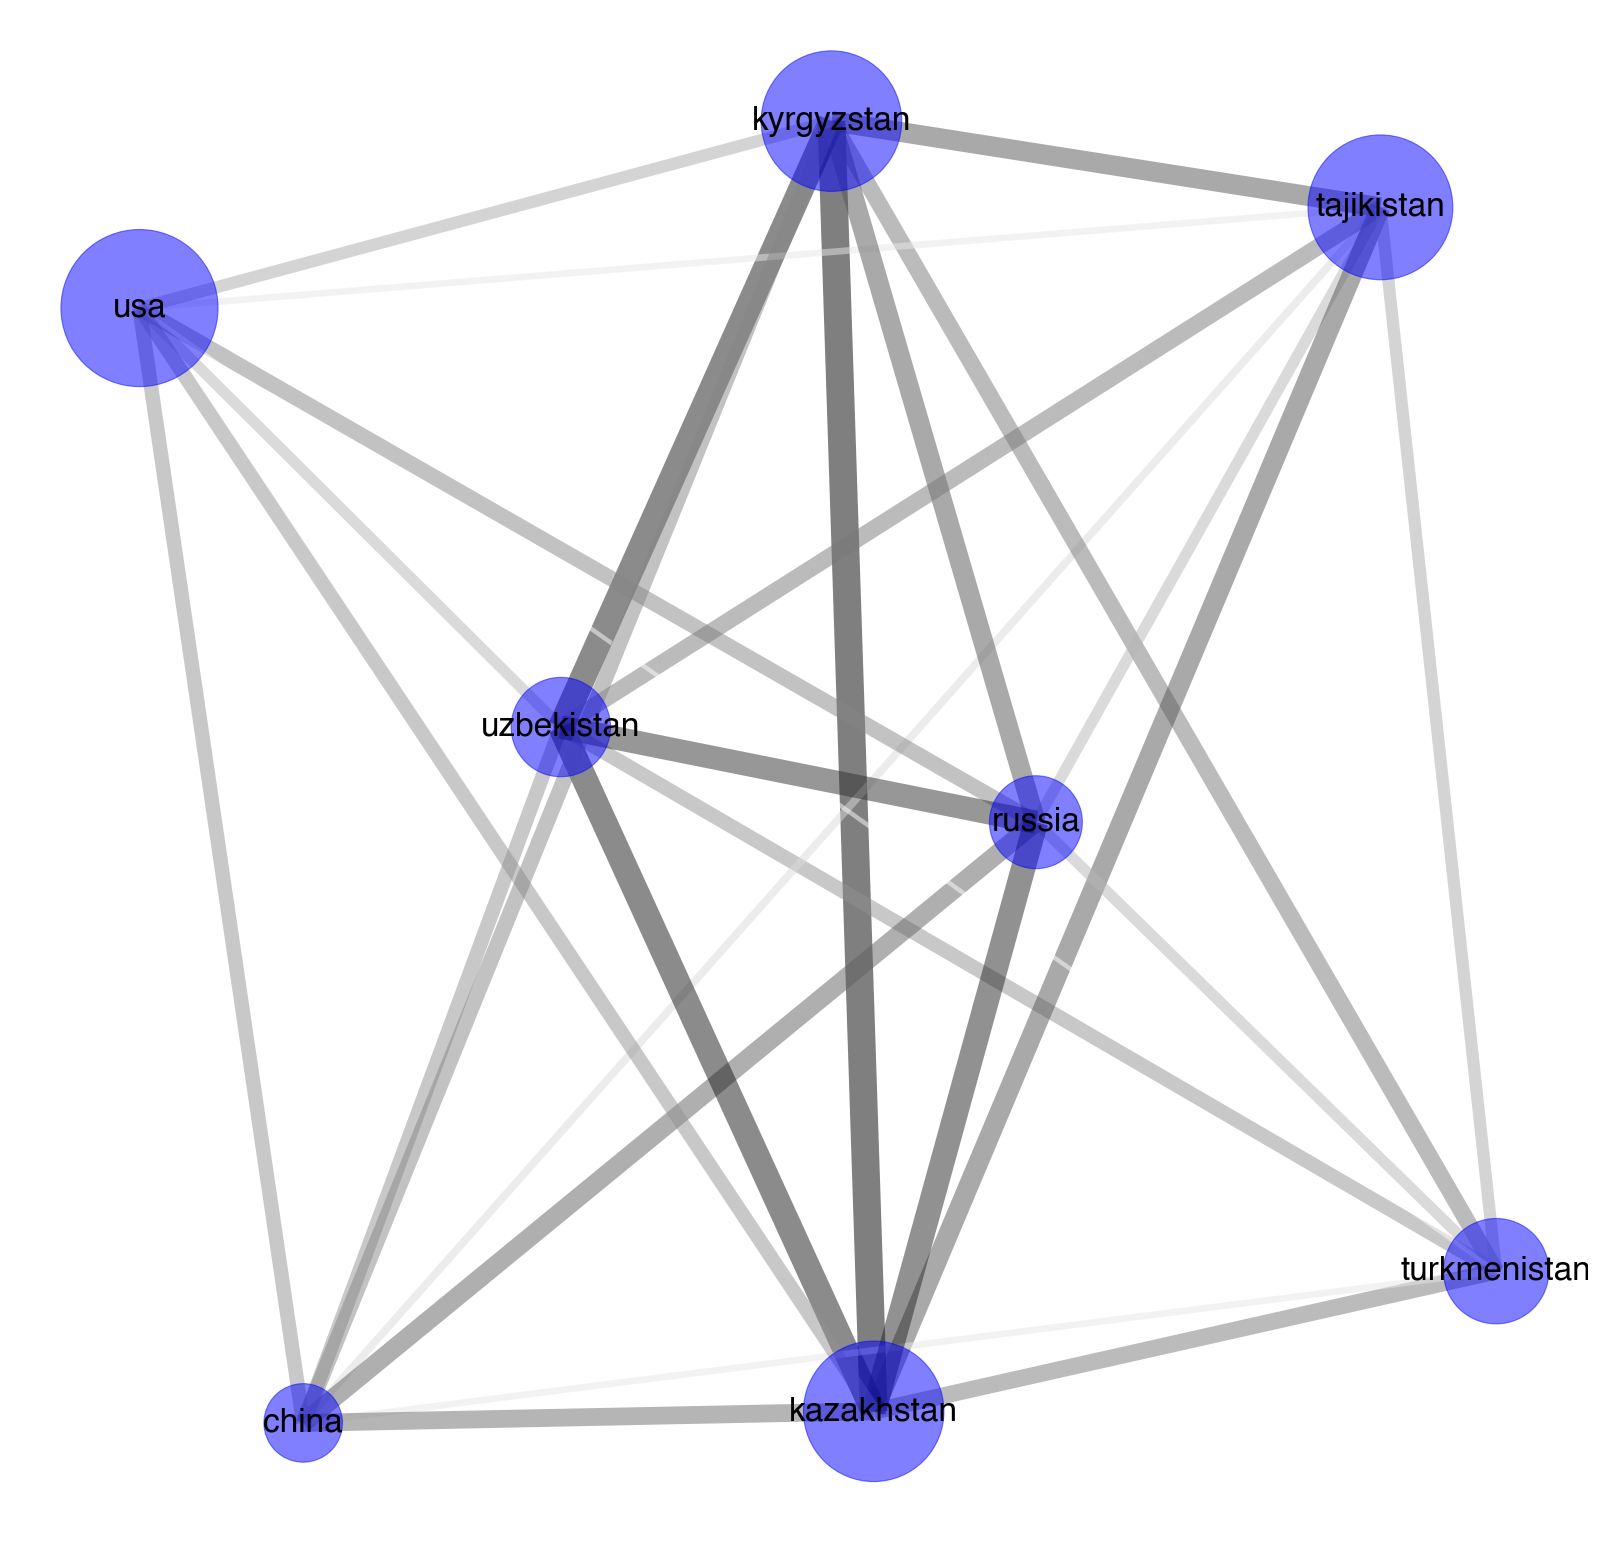

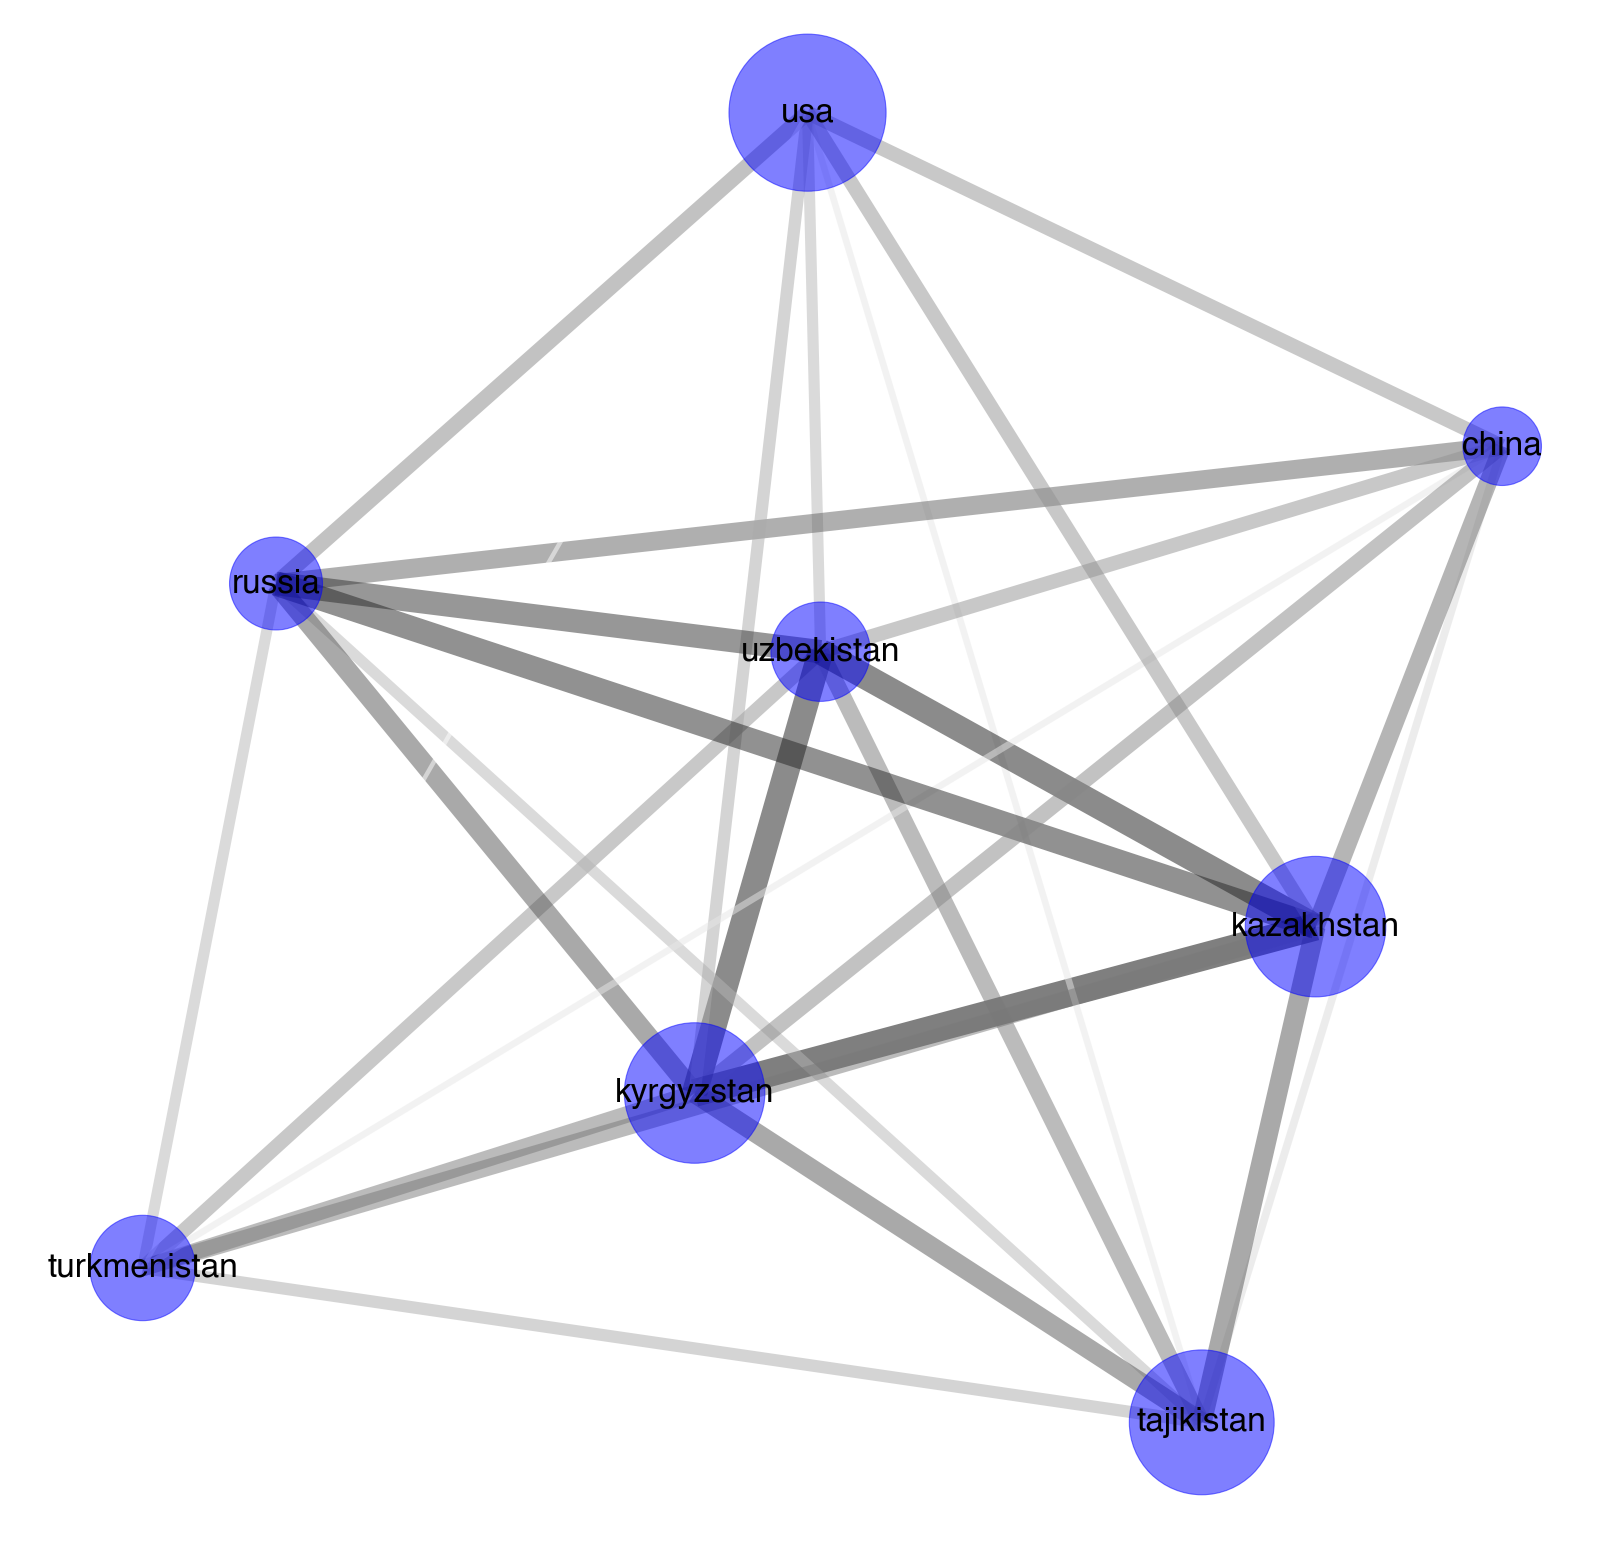

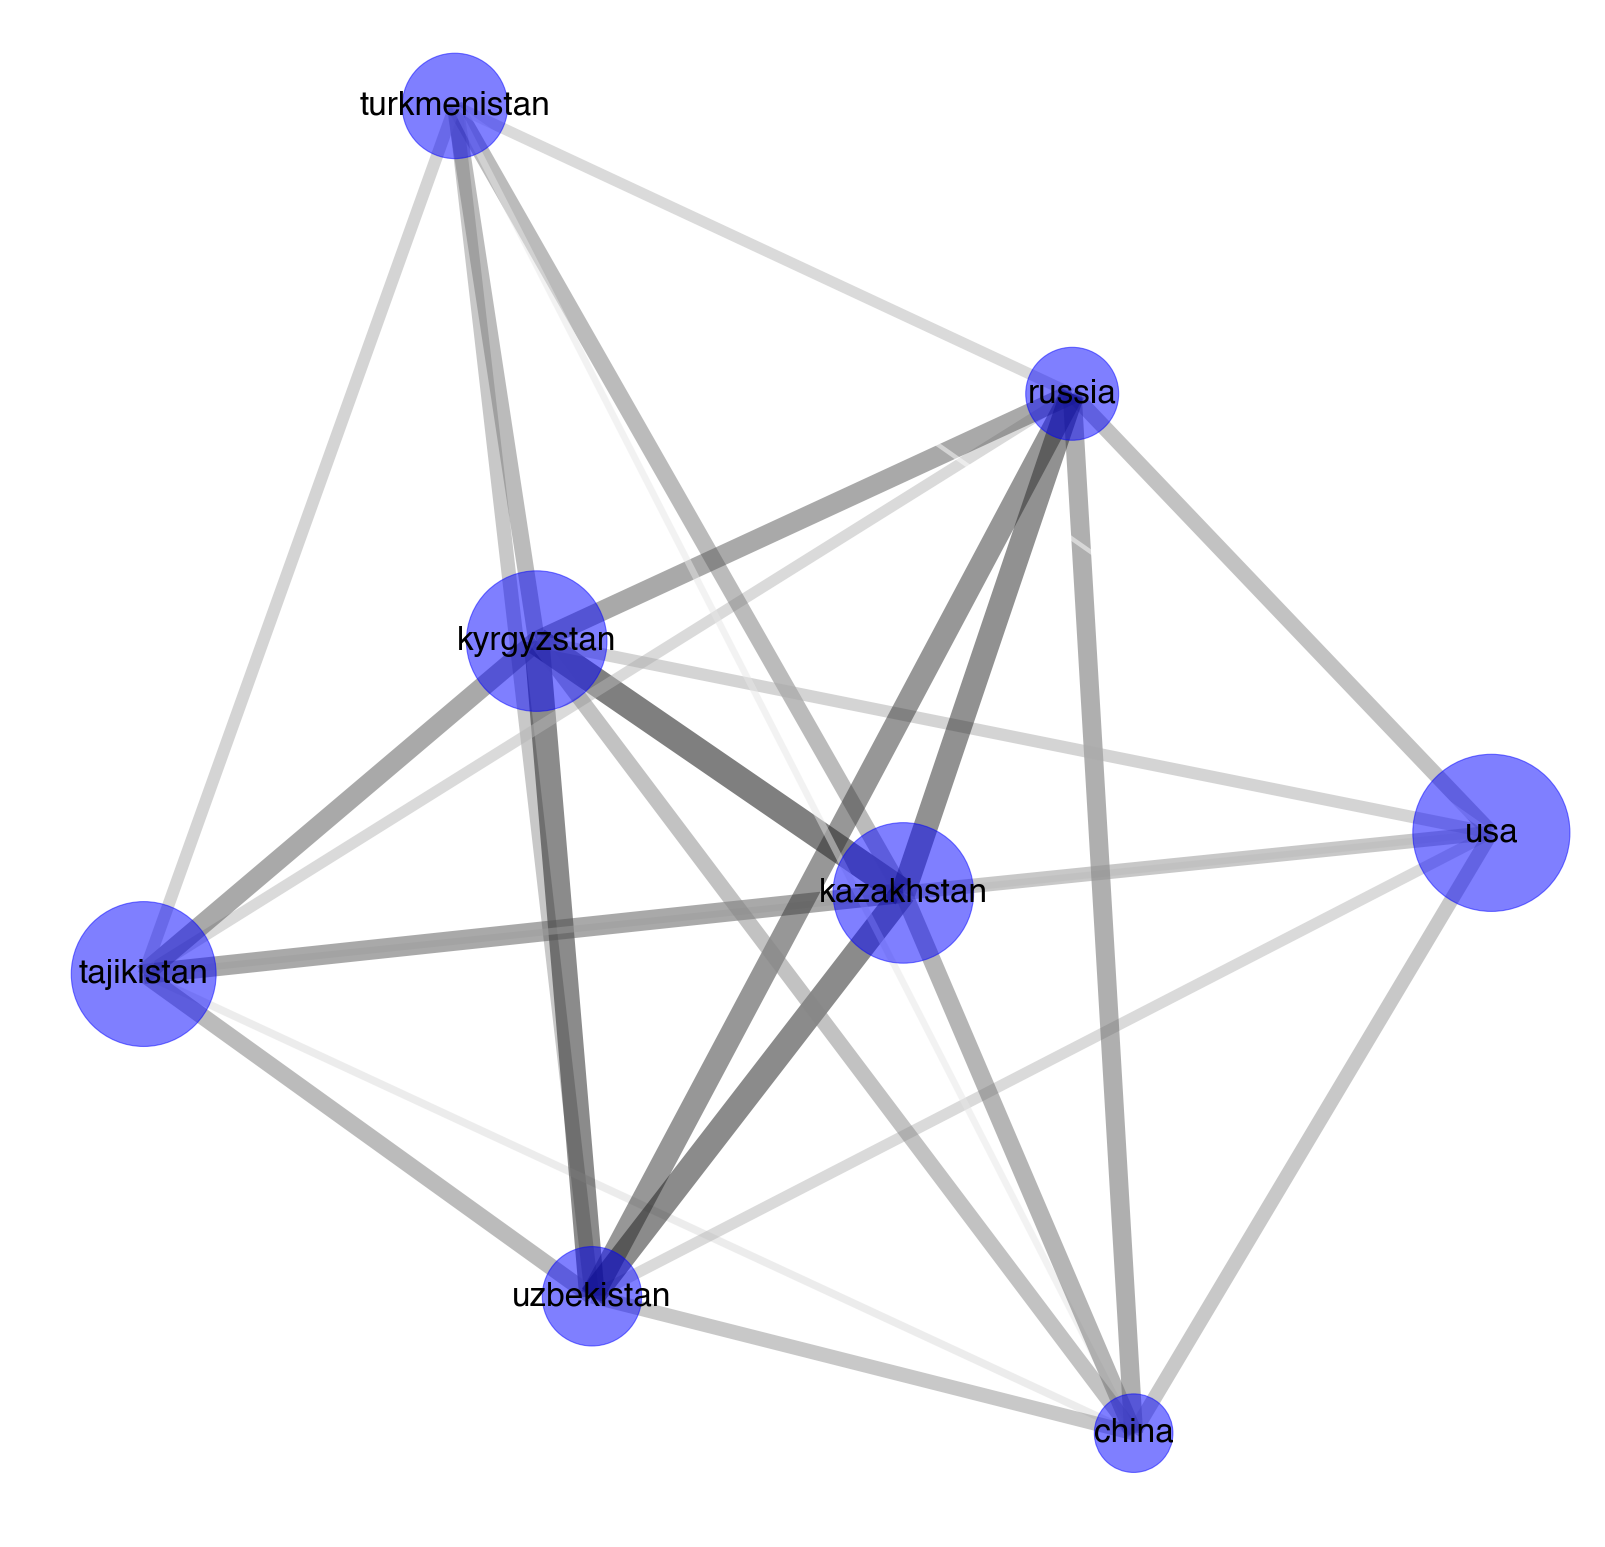

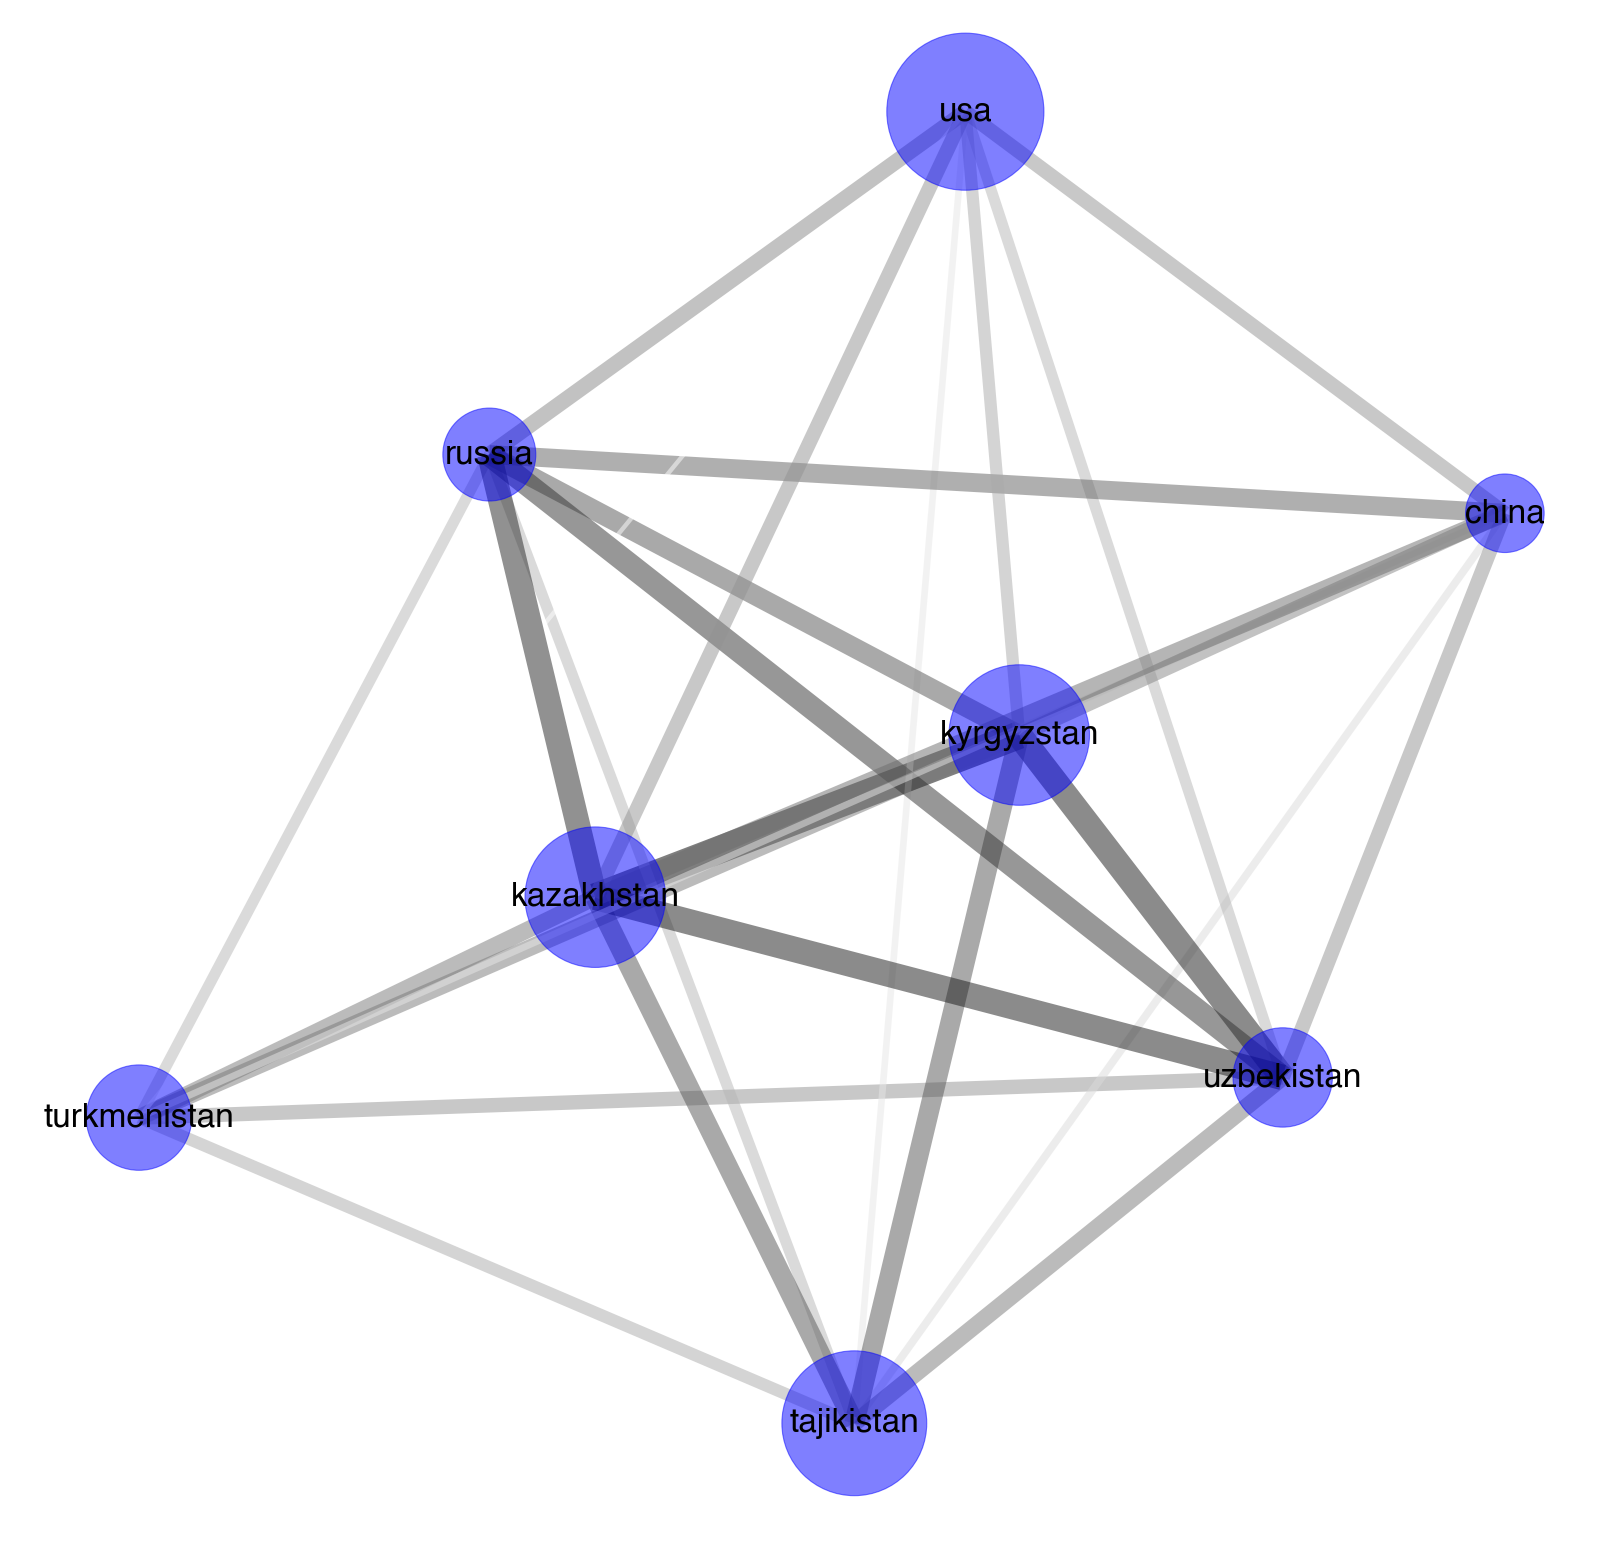

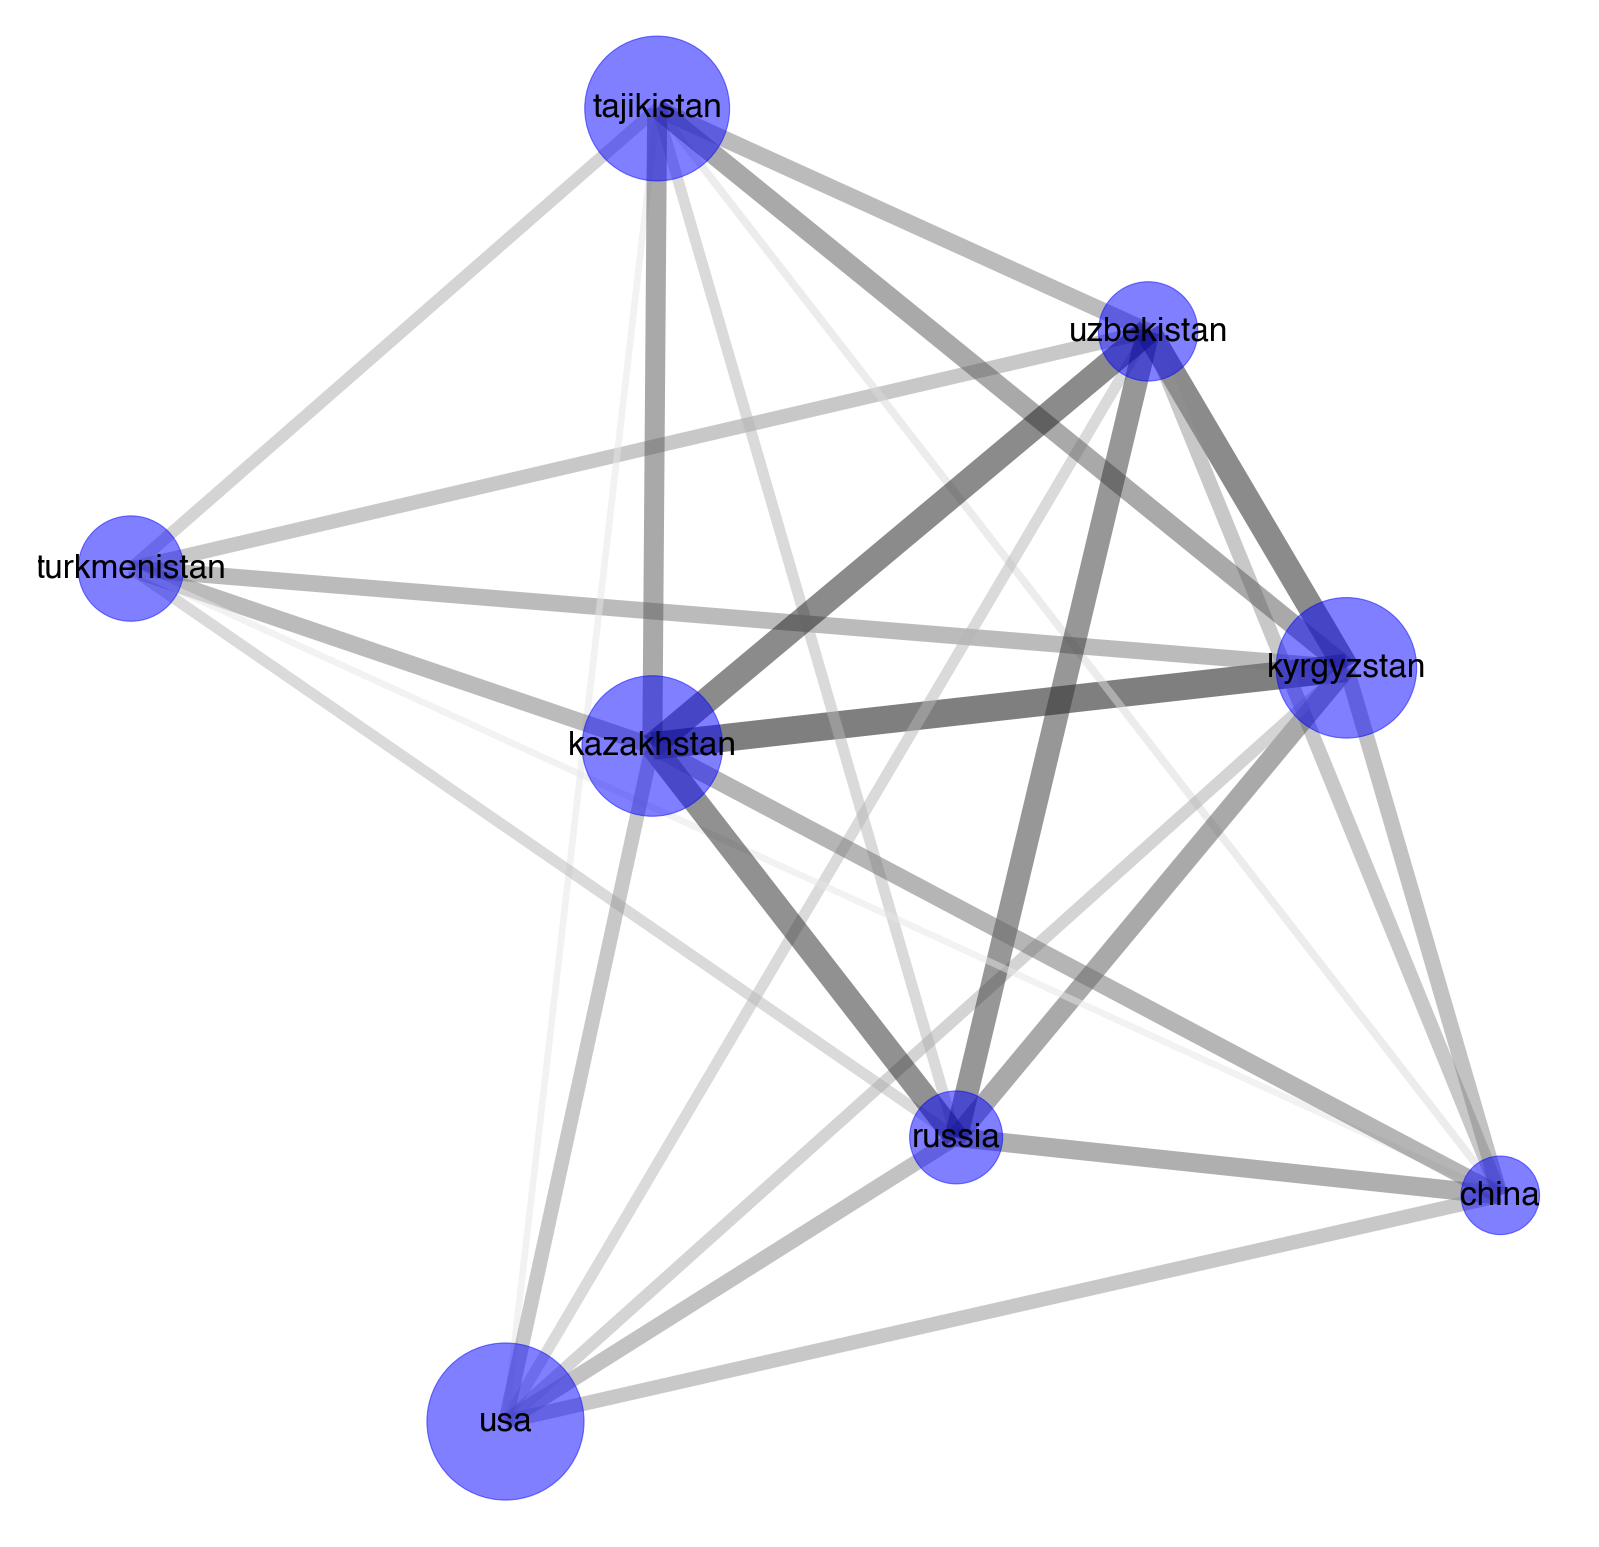

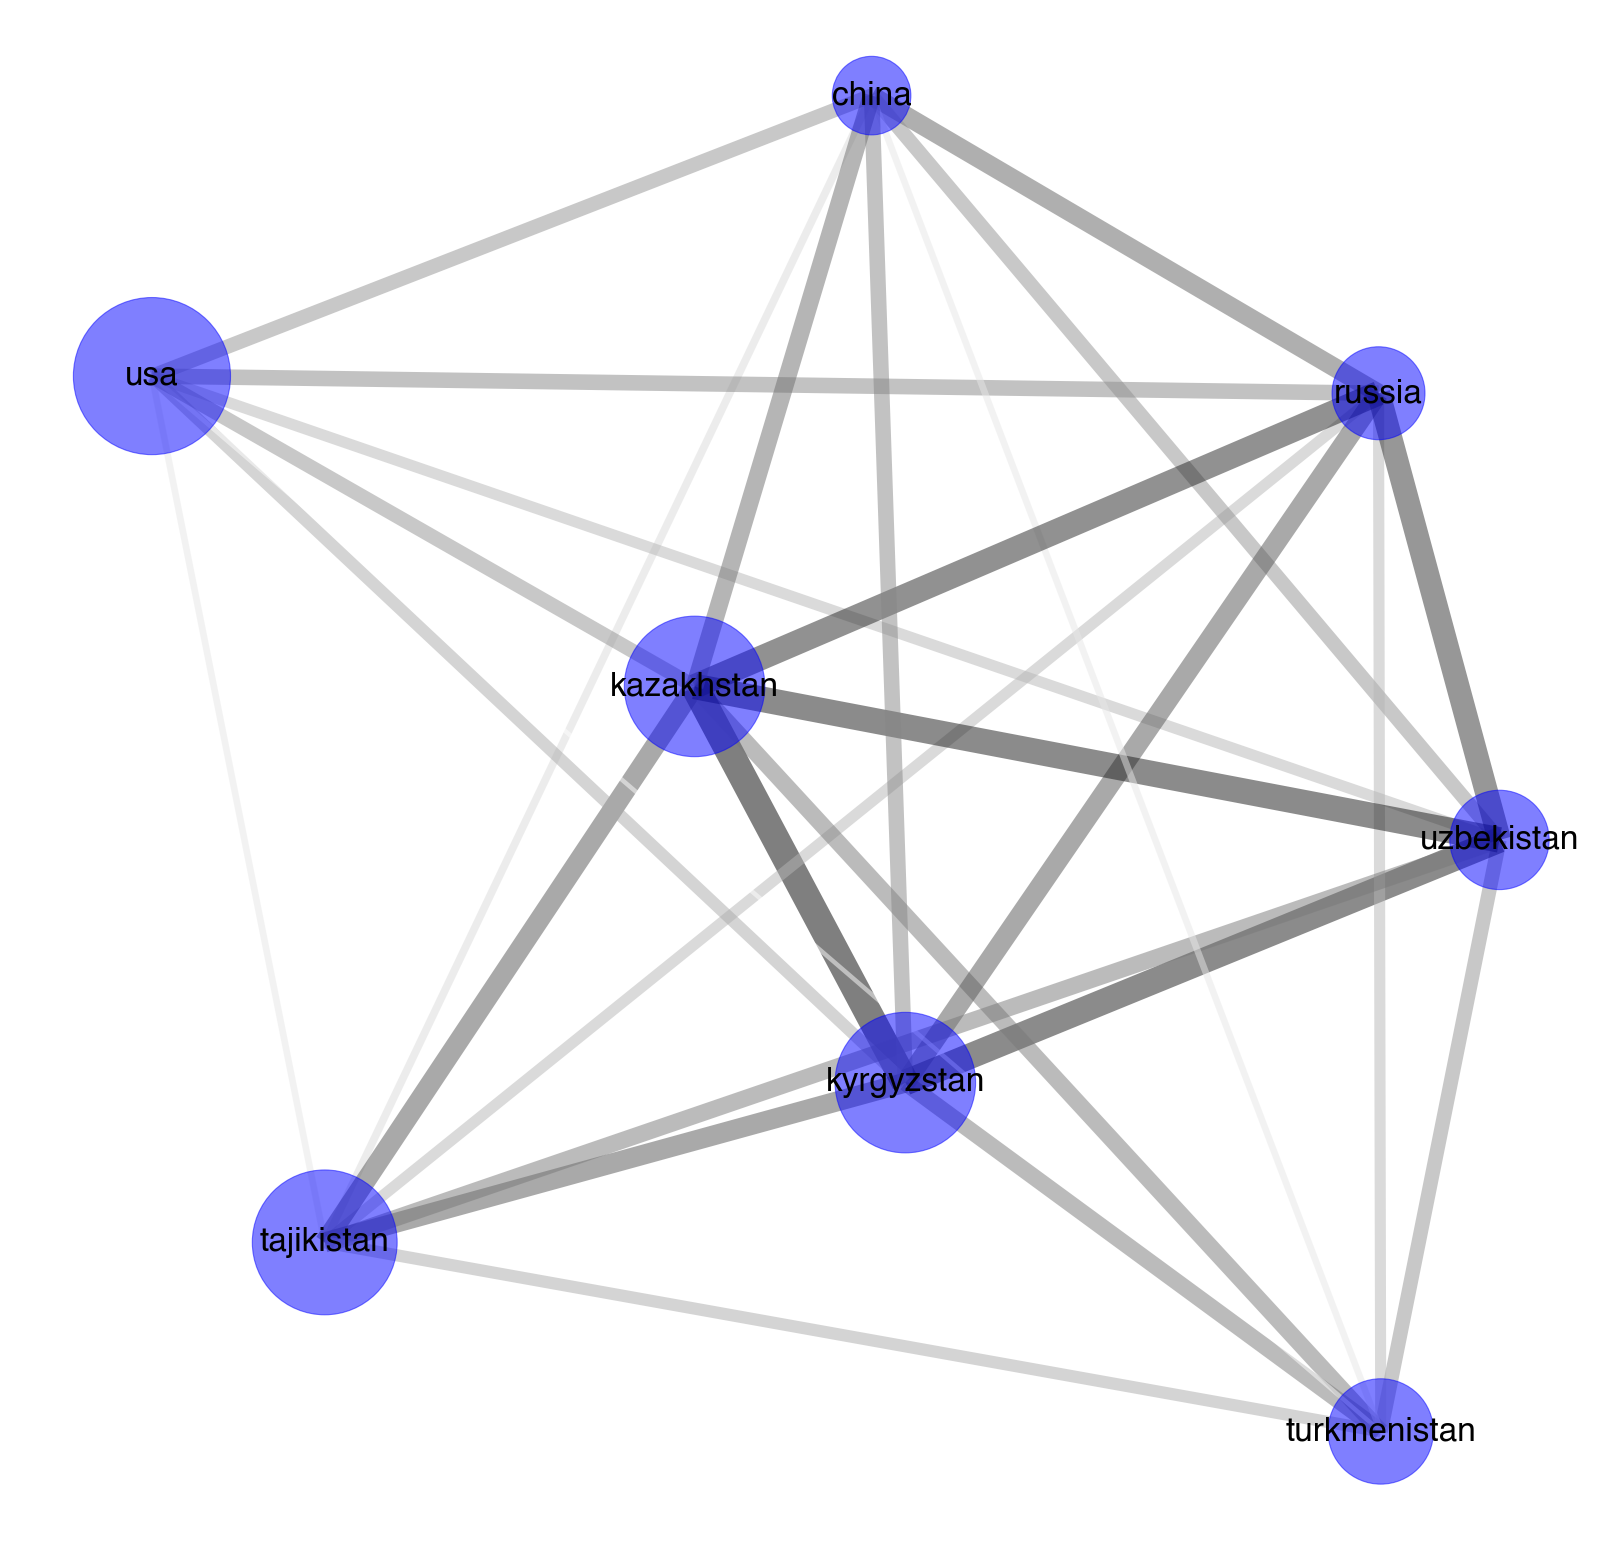

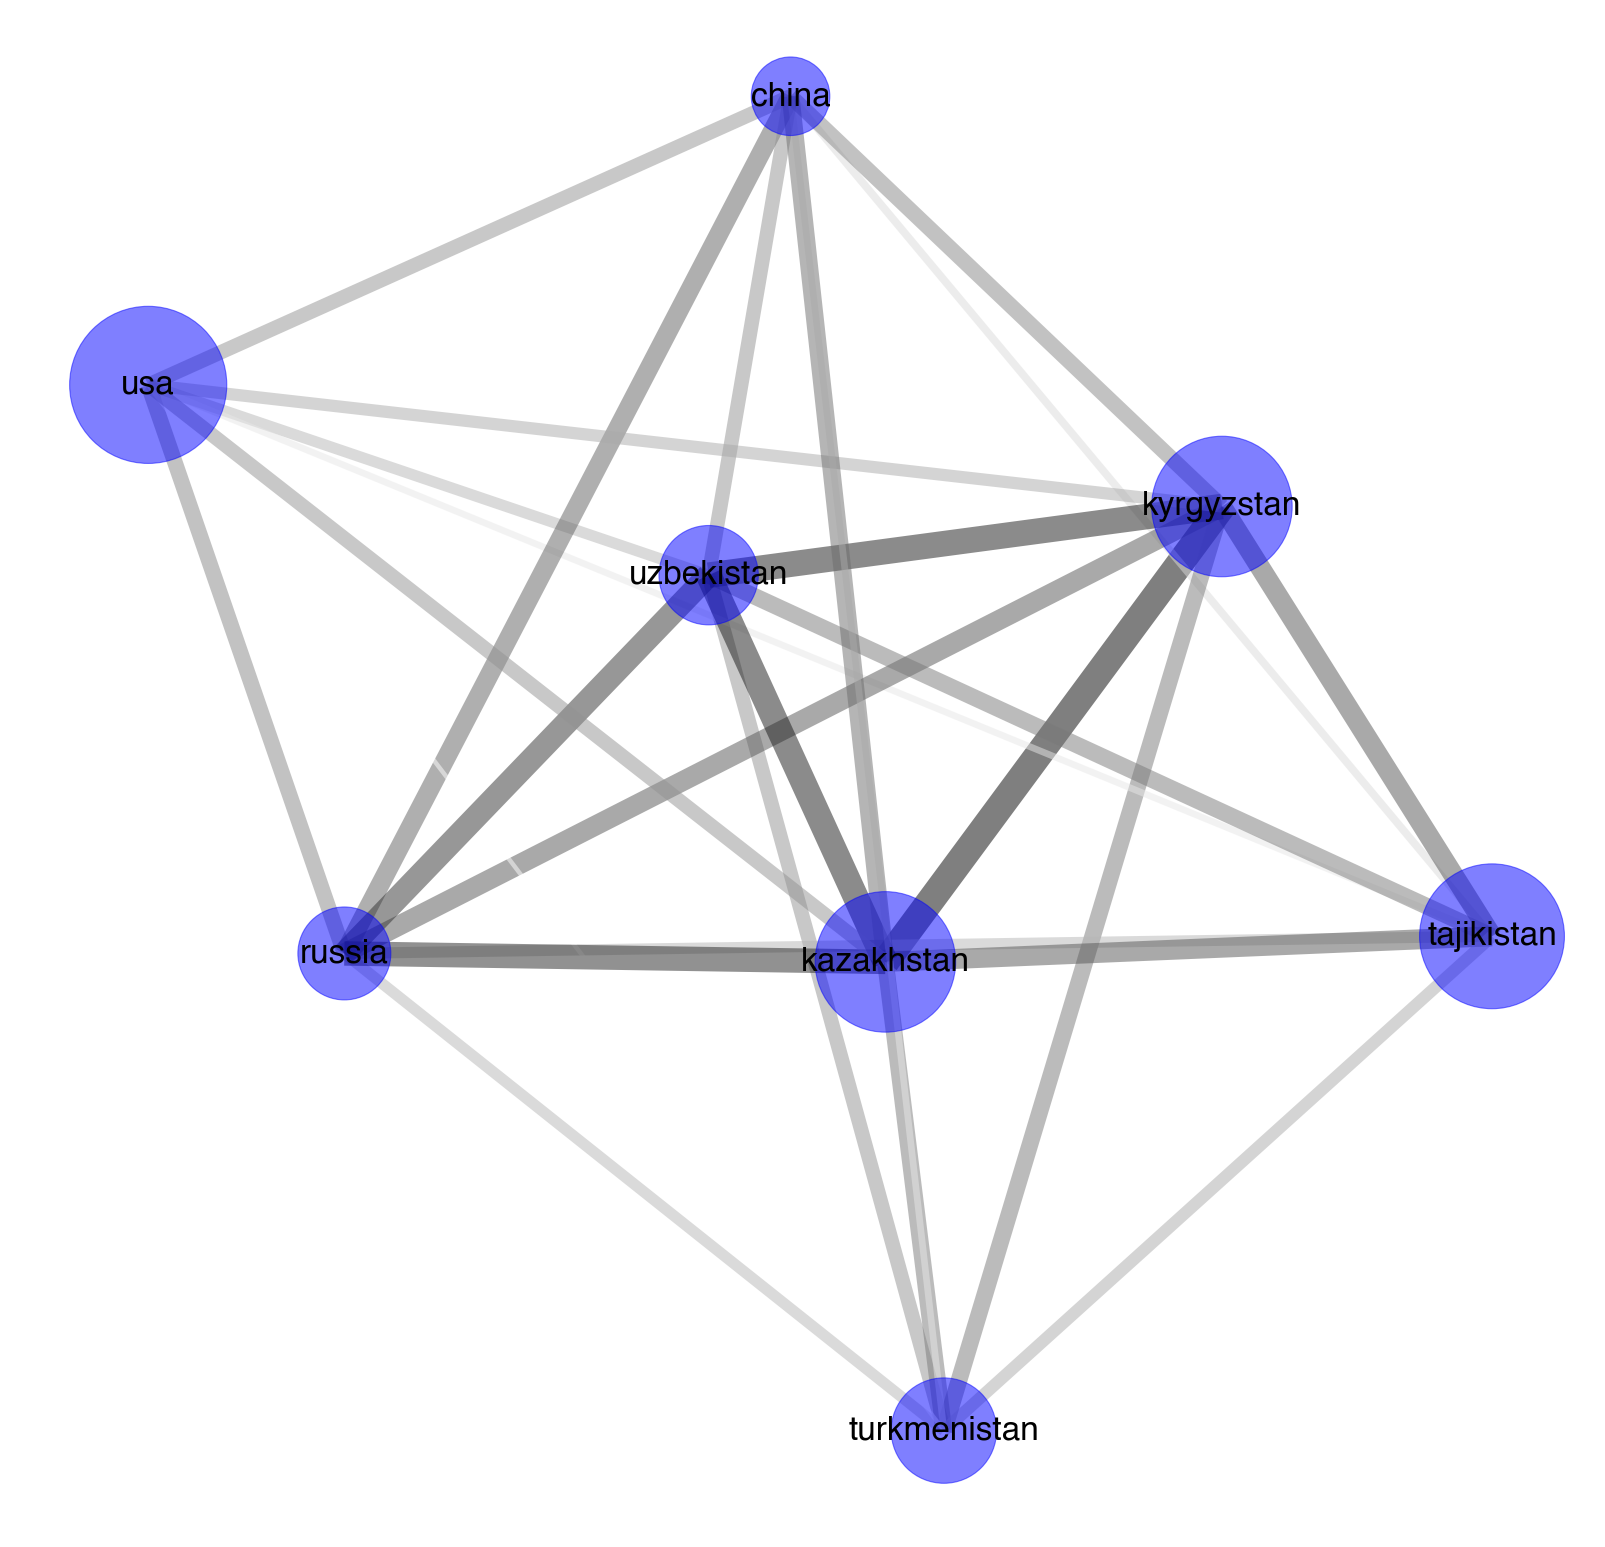

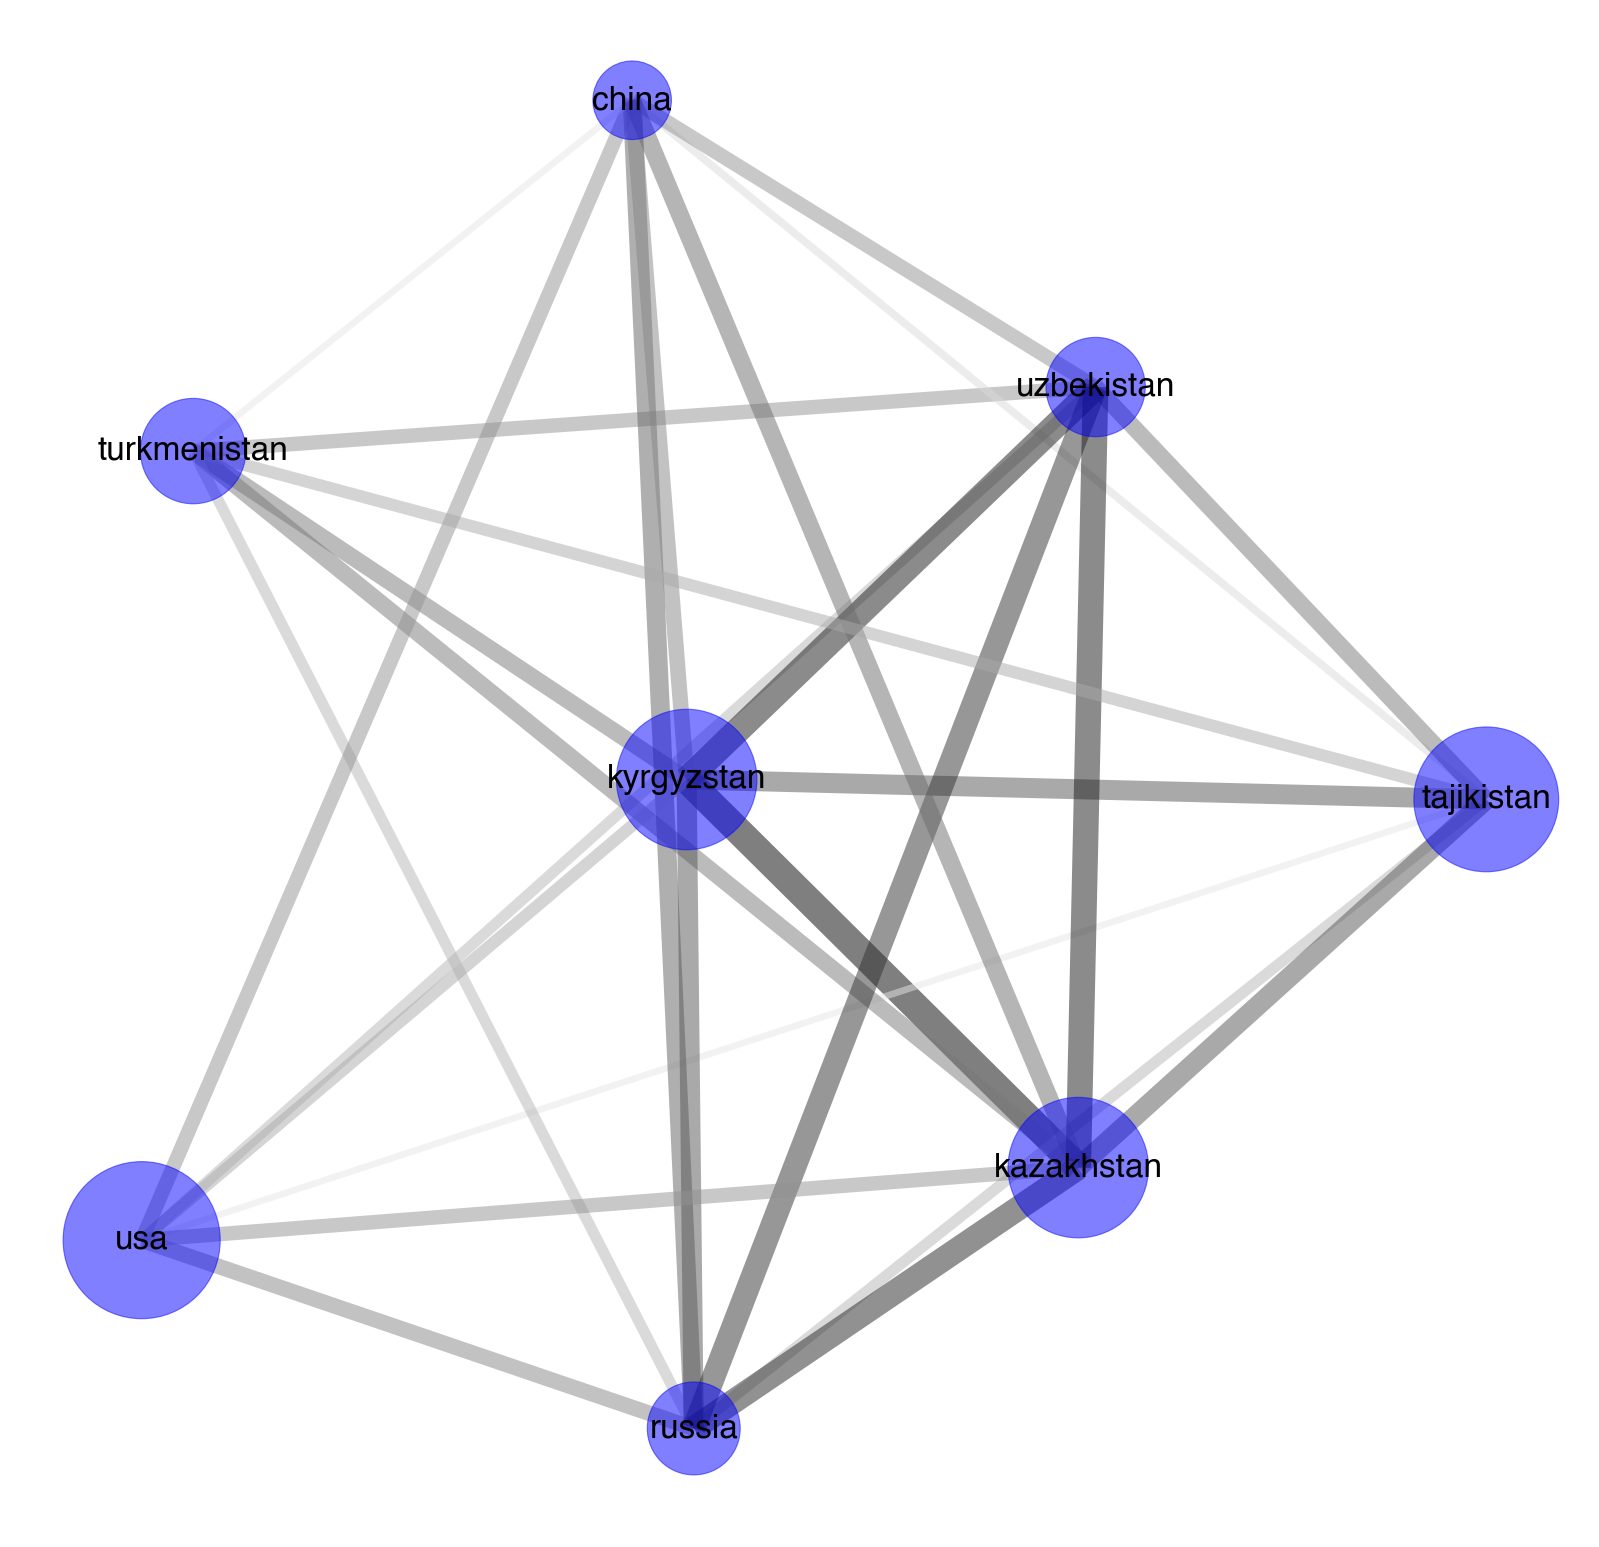

In [738]:
for i in range(20):
    plt.figure(num=None, figsize=(25, 25), dpi=80)

    pos=nx.spring_layout(G,iterations=800) # positions for all nodes

    # nodes
    #nx.draw_networkx_nodes(G,pos,node_size=100)

    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    nx.draw_networkx_labels(G,pos,font_size=30,font_family='sans-serif')

    nx.draw(G, pos, node_color='b', edgelist=edges, edge_color=weights,alpha=0.5,node_size=(d*1000-min(dmin)-6000).tolist(),width=(np.array(weights)-min(weightmin)).tolist(), edge_cmap=plt.cm.binary)
    datename = "analysis" + datetime.now().strftime( "_%Y%m%d__%H_%M_%S" )

    plt.savefig('./plots_adjusted/%s%s.png'%(fn.replace("./",""),datename))

    ## edges
    #nx.draw_networkx_edges(G,pos,edgelist=elarge,
    #                    width=1)
    #nx.draw_networkx_edges(G,pos,edgelist=esmall,
    #                    width=1,alpha=0.5,edge_color='b',style='dashed')
    #
    ## labels
    #nx.draw_networkx_labels(G,pos,font_size=30,font_family='sans-serif')
    #
    #plt.axis('off')
    #plt.savefig("weighted_graph.png") # save as png
    #plt.show() # display

In [681]:
weightmin.append(min((np.array(weights)).tolist()))

In [507]:
dmin.append(min((d*1000).tolist()))

In [682]:
print weightmin,dmin

[2.0, 5.0, 5.0, 5.0, 6.0, 8.0, 21.0, 5.0, 5.0] [7000.0, 14000.0, 18000.0, 18000.0, 18000.0, 21000.0, 34000.0]


In [520]:
print d

[ 75.  71.  36.  42.  53.  81.  49.  47.  37.  34.  44.  67.  69.]


In [581]:
min(d)

14.0

In [ ]:
node_size=(d*1000-(min(d*1000)-2000)).tolist(),width=(np.array(weights)-(min(np.array(weights)))-2).tolist(), edge_cmap=plt.cm.binary)

In [590]:
(d*1000-(min(dmin)-30000)).tolist()

[45000.0, 38000.0, 47000.0, 44000.0, 37000.0, 42000.0, 46000.0, 38000.0]

In [593]:
(d*1000-min(dmin)-3000).tolist()

[12000.0, 5000.0, 14000.0, 11000.0, 4000.0, 9000.0, 13000.0, 5000.0]